# Women's Healthy Eating and Living Study: ML Project

## About the Study: Background Information 

### Study Objective
Evaluating the effectiveness of a high-vegetable, low-fat diet, aimed at markedly raising circulating carotenoid concentrations from food sources, in **reducing additional breast cancer** events and early death in women with **early-stage invasive breast cancer (within 4 years of diagnosis).**

### The Study
The study randomly assigned 3088 such women to an **intensive diet** intervention or to a comparison group between 1995 and 2000 and followed them through 2006. Two thirds of these women were under 55 years of age at randomization. This research study had a coordinating center and seven clinical sites. Randomization was stratified by age, stage of tumor and clinical site. A comprehensive intervention program that included intensive telephone counseling, cooking classes and print materials helped shift the dietary pattern of women in the intervention. Through an innovative telephone counseling program, dietary counselors encouraged women in the intervention group to meet the following daily behavioral targets: five vegetable servings, 16 ounces of vegetable juice, three fruit servings, 30 g of fiber and 15-20% energy from fat. Adherence assessments occurred at baseline, 6, 12, 24 or 36, 48 and 72 months. These assessments can include dietary intake (repeated 24-hour dietary recalls and food frequency questionnaire), circulating carotenoid concentrations, **physical measures** and **questionnaires** about health symptoms, quality of life, personal habits and lifestyle patterns. Outcome assessments were completed by telephone interview every 6 months with medical record verification. We assessed evidence of effectiveness by the length of the breast cancer event-free interval, as well as by overall survival separately in all the women in the study as well as specifically in women under and over the age of 55 years.


## Terminology: 
- **Lumpectomy**:  surgery to remove cancer or other abnormal tissue from your breast
- **Mastectomy**: surgical operation to remove a breast

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

## Reading Data 

### Baseline

In [2]:
def baseline_path(filename):
    return "C:/Users/leena/Niema_ML/data/Baseline-Data/" + filename

In [3]:
# demographics 
base_demo = pd.read_excel(baseline_path("demographics.xls"))

#medial/clinic measurements
base_measure = pd.read_excel(baseline_path("Medical.xls"))

#food from nds
base_foodnds = pd.read_excel(baseline_path("NDSDIET.xls"))

#supplements
base_supplements = pd.read_excel(baseline_path("Nsupps.xls"))

#thoughts and feelings
base_feelings = pd.read_excel(baseline_path("TFbase.xls"))

#personal habits
base_habits = pd.read_excel(baseline_path("phbase.xls"))

#lifestyle questionaire
base_lifestyle = pd.read_excel(baseline_path("LIFESTYLE.xls"))

#health status
base_health_status = pd.read_excel(baseline_path("Health_Status.xls"))

#family history
base_family = pd.read_excel(baseline_path("FAMHX.xls"))

#reproductive history
base_reproductive = pd.read_excel(baseline_path("REPROHX.xls"))

#food frequency questionaire 
base_foodfreq = pd.read_excel(baseline_path("ffq0.xls"))

#blood carotenoids
base_bloodcaro = pd.read_excel(baseline_path("carot0.xls"))


In [4]:
all_base_df = [base_demo, base_measure, base_foodnds, base_supplements,
               base_feelings, base_habits, base_lifestyle, base_health_status,
              base_family, base_reproductive, base_foodfreq, base_bloodcaro]

In [5]:
# for merging 
b_measure_merge = base_measure.dropna()
b_measure_merge = b_measure_merge.get(['ID', 'Stage', 'Tumor Type'])

### Year 1

In [6]:
def y1_path(filename):
    return "C:/Users/leena/Niema_ML/data/Year-1-Data/" + filename

In [7]:
#clinical measurements
y1_clinical = pd.read_excel(y1_path("clinicaly1.xls"))

#food from NDS
y1_foodnds = pd.read_excel(y1_path("ndsfoody1.xls"))

#supplements
y1_supplements = pd.read_excel(y1_path("nsuppsy1.xls"))

#thoughts and feelings
y1_feelings = pd.read_excel(y1_path("tfy1.xls"))

#personal habits
y1_habits = pd.read_excel(y1_path("phy1.xls"))

#health status
y1_health_status = pd.read_excel(y1_path("healthstaty1.xls"))

#food frequency questionaire 
y1_foodfreq = pd.read_excel(y1_path("ffq1.xls"))

#blood carotenoids 
y1_bloodcaro = pd.read_excel(y1_path("caroty1.xls"))


In [8]:
all_y1_df = [y1_clinical, y1_foodnds, y1_supplements, y1_feelings,
            y1_habits, y1_health_status, y1_foodfreq, y1_bloodcaro]

### Year 4

In [9]:
def y4_path(filename): 
    return "C:/Users/leena/Niema_ML/data/Year-4-Data/"+ filename

In [10]:
#clinical measurements
y4_clinical = pd.read_excel(y4_path("clinicaly4.xls"))

#food from NDS
y4_foodnds = pd.read_excel(y4_path("ndsfoody4.xls"))

#supplements
y4_supplements = pd.read_excel(y4_path("nsuppsy4.xls"))

#thoughts and feelings
y4_feelings = pd.read_excel(y4_path("tfy4.xls"))

#personal habits
y4_habits = pd.read_excel(y4_path("phy4.xls"))

#health status
y4_health_status = pd.read_excel(y4_path("healthstaty4.xls"))

#food frequency questionaire
y4_foodfreq = pd.read_excel(y4_path("ffq4.xls"))

#blood carotenoids
y4_bloodcaro = pd.read_excel(y4_path("caroty4.xls"))

In [11]:
all_y4_df = [y4_clinical, y4_foodnds, y4_supplements, y4_feelings,
            y4_habits, y4_health_status, y4_foodfreq, y4_bloodcaro]

### Data - Final

In [6]:
endpoints_df = pd.read_excel("C:/Users/leena/Niema_ML/data/endpoints.xls")
mealtimes_df = pd.read_csv("C:/Users/leena/Niema_ML/data/mealtimes_final.csv")

# Baseline Datasets

## Health Status

#### Cleaning

In [13]:
base_health_status.get('hospital_').unique() # 6?, nan - unknown

array([ 0.,  1.,  6., nan])

In [14]:
b_status_clean = base_health_status.dropna()
b_status_clean = b_status_clean[b_status_clean.get('Exam_Freq') != 6 ] # 6 = unknown 

In [15]:
print(b_status_clean.shape)
b_status_clean.head()

(2522, 14)


ID  hospital_  Exam_Freq  Proph_Mast  Blood_Sugar  Cardiovascular  \
0  13245        0.0        1.0         0.0          0.0             0.0   
1  13244        1.0        1.0         0.0          0.0             0.0   
2  13243        0.0        1.0         0.0          0.0             0.0   
3  13242        0.0        1.0         0.0          0.0             0.0   
4  13241        0.0        3.0         0.0          0.0             0.0   

   Digestive  Arthritis  Osteoporosis  Misc_Cond  Blood_Sugar_Meds  \
0        0.0        0.0           0.0        0.0               0.0   
1        0.0        0.0           0.0        0.0               0.0   
2        0.0        0.0           0.0        0.0               0.0   
3        0.0        0.0           0.0        0.0               0.0   
4        0.0        0.0           0.0        1.0               0.0   

   Cardio_Meds  Gastro_Meds  Corticosteroids_  
0          0.0          0.0               0.0  
1          0.0          0.0               0.0  
2          0.0          0.0               0.0  
3          0.0          0.0               0.0  
4          1.0          1.0               0.0

### Distribution Categorized by Hospitalized  
- Hospitalized in last 2 years ( 0 – No, 1 – Yes)



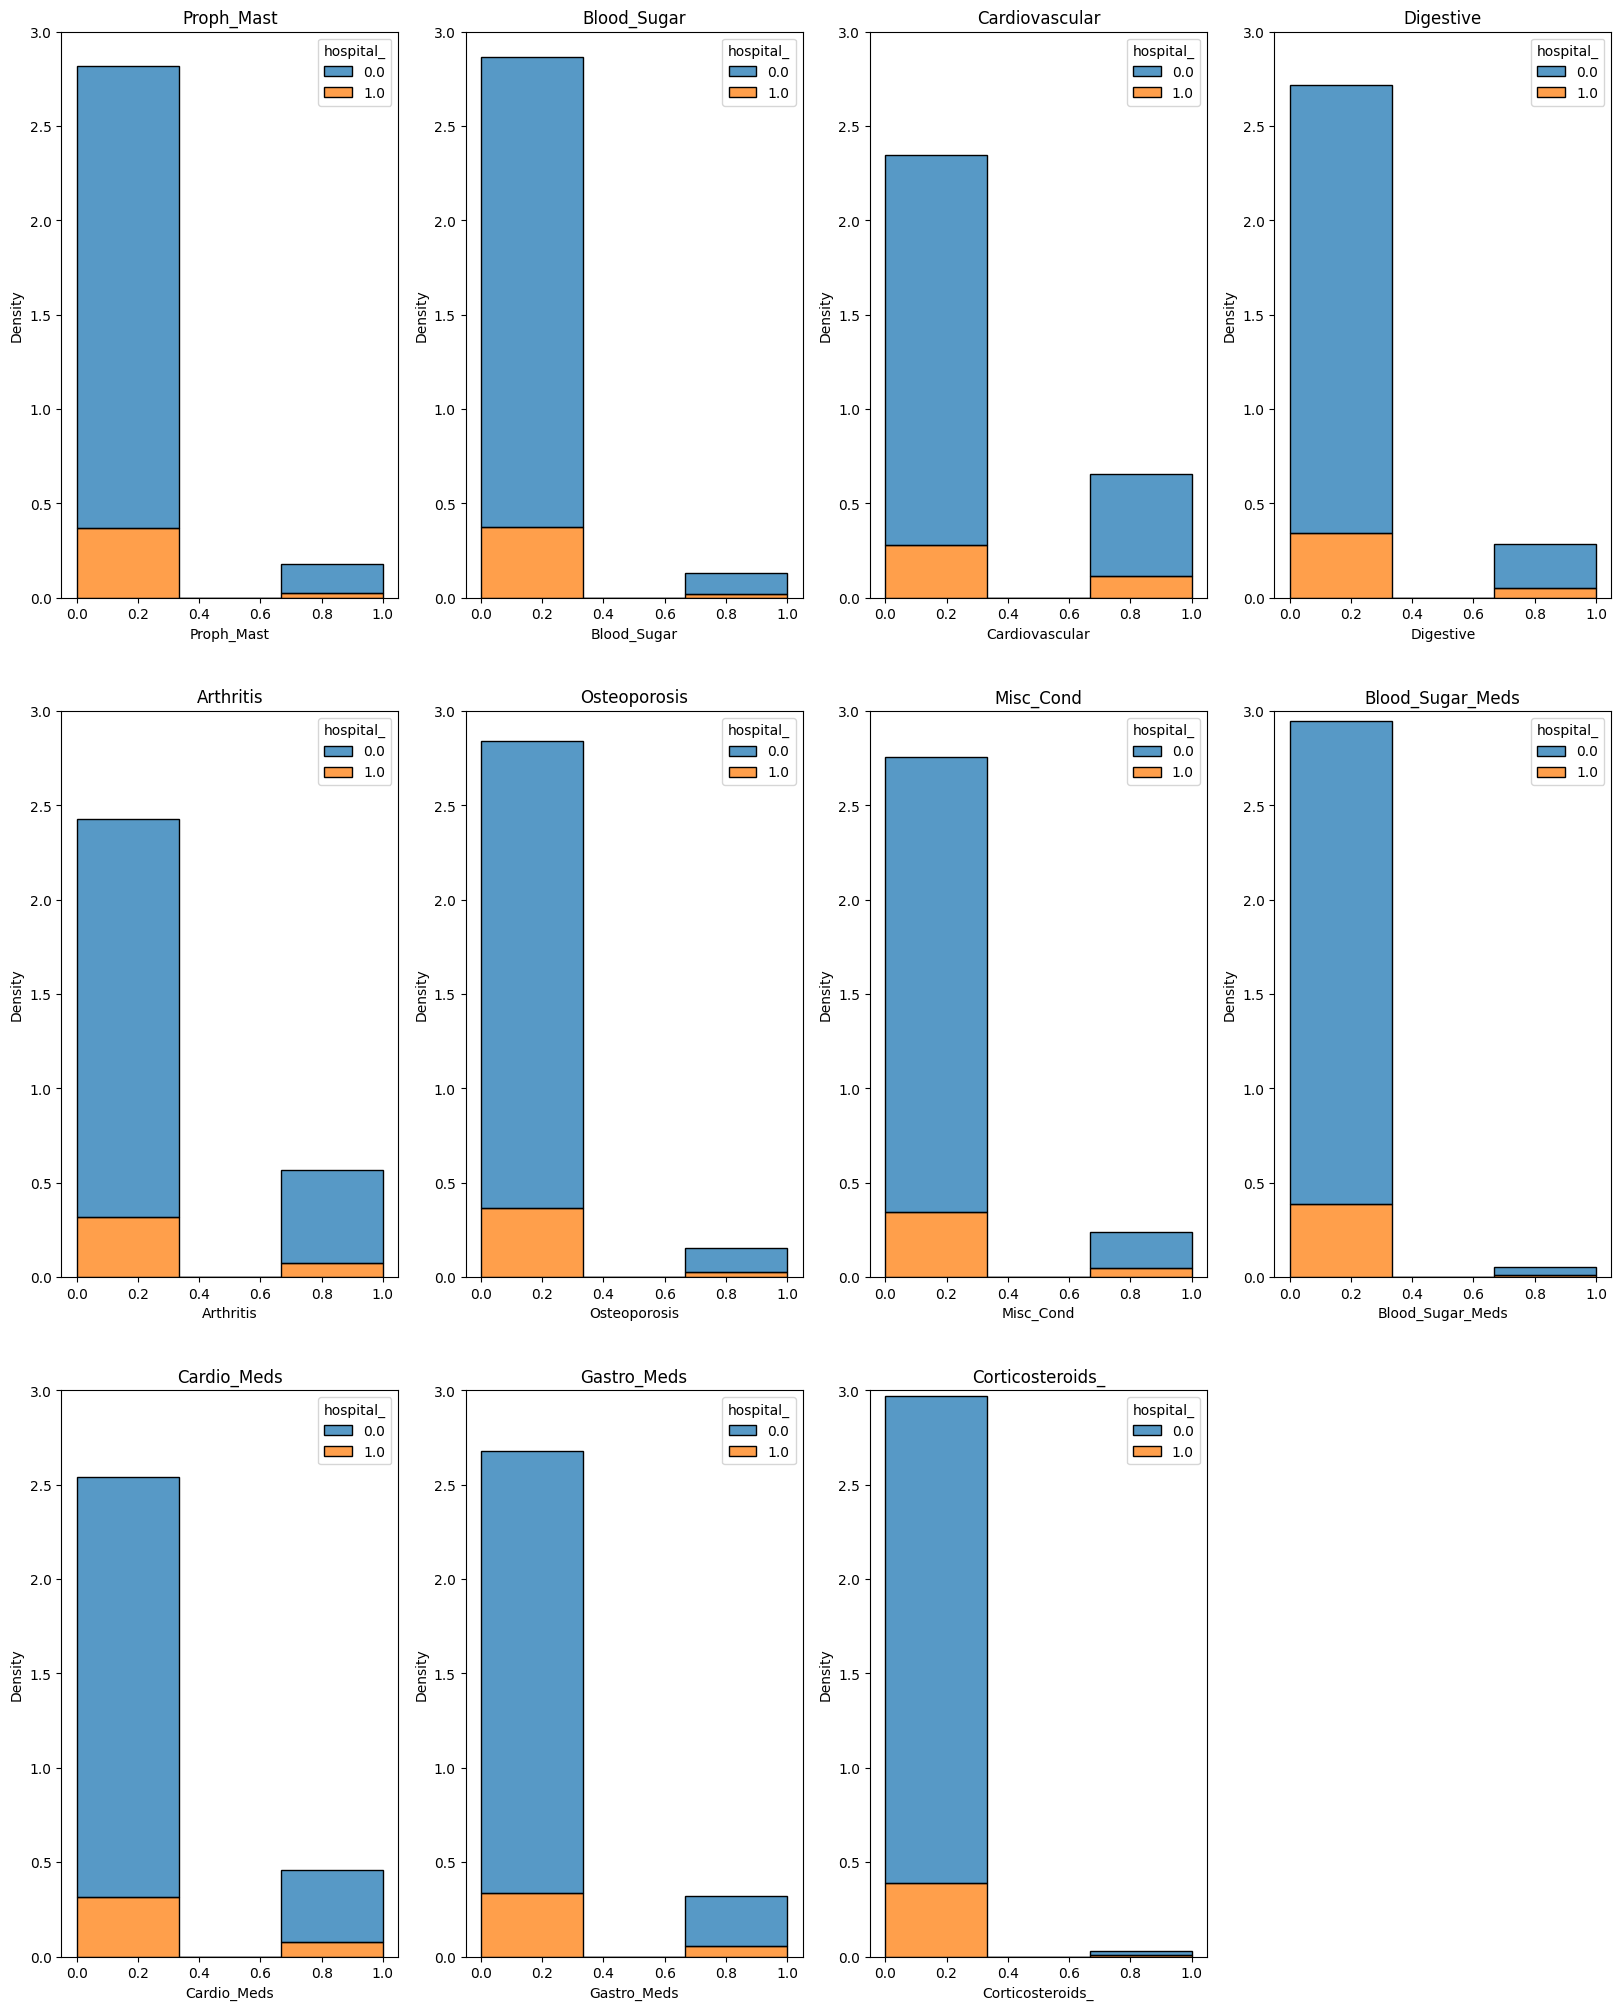

In [16]:
pos = 1
plt.figure(figsize=(20,25))
for col in b_status_clean.columns:
    if col not in ['ID', 'hospital_', 'Exam_Freq']:
        plt.subplot(3,4,pos)
        sns.histplot(data=b_status_clean, x=col, hue='hospital_', stat='density', multiple='stack', bins=3)
        plt.ylim(0,3)
        plt.title(f"{col}")
        pos += 1

### Distribution Categorized by Exam_Freq
- Breast cancer exam frequency

    1 – Every 3 to 4 months
    
	2 – Every 6 months
    
	3 – Yearly
    
	4 – Not followed
    
	5 – Other
    


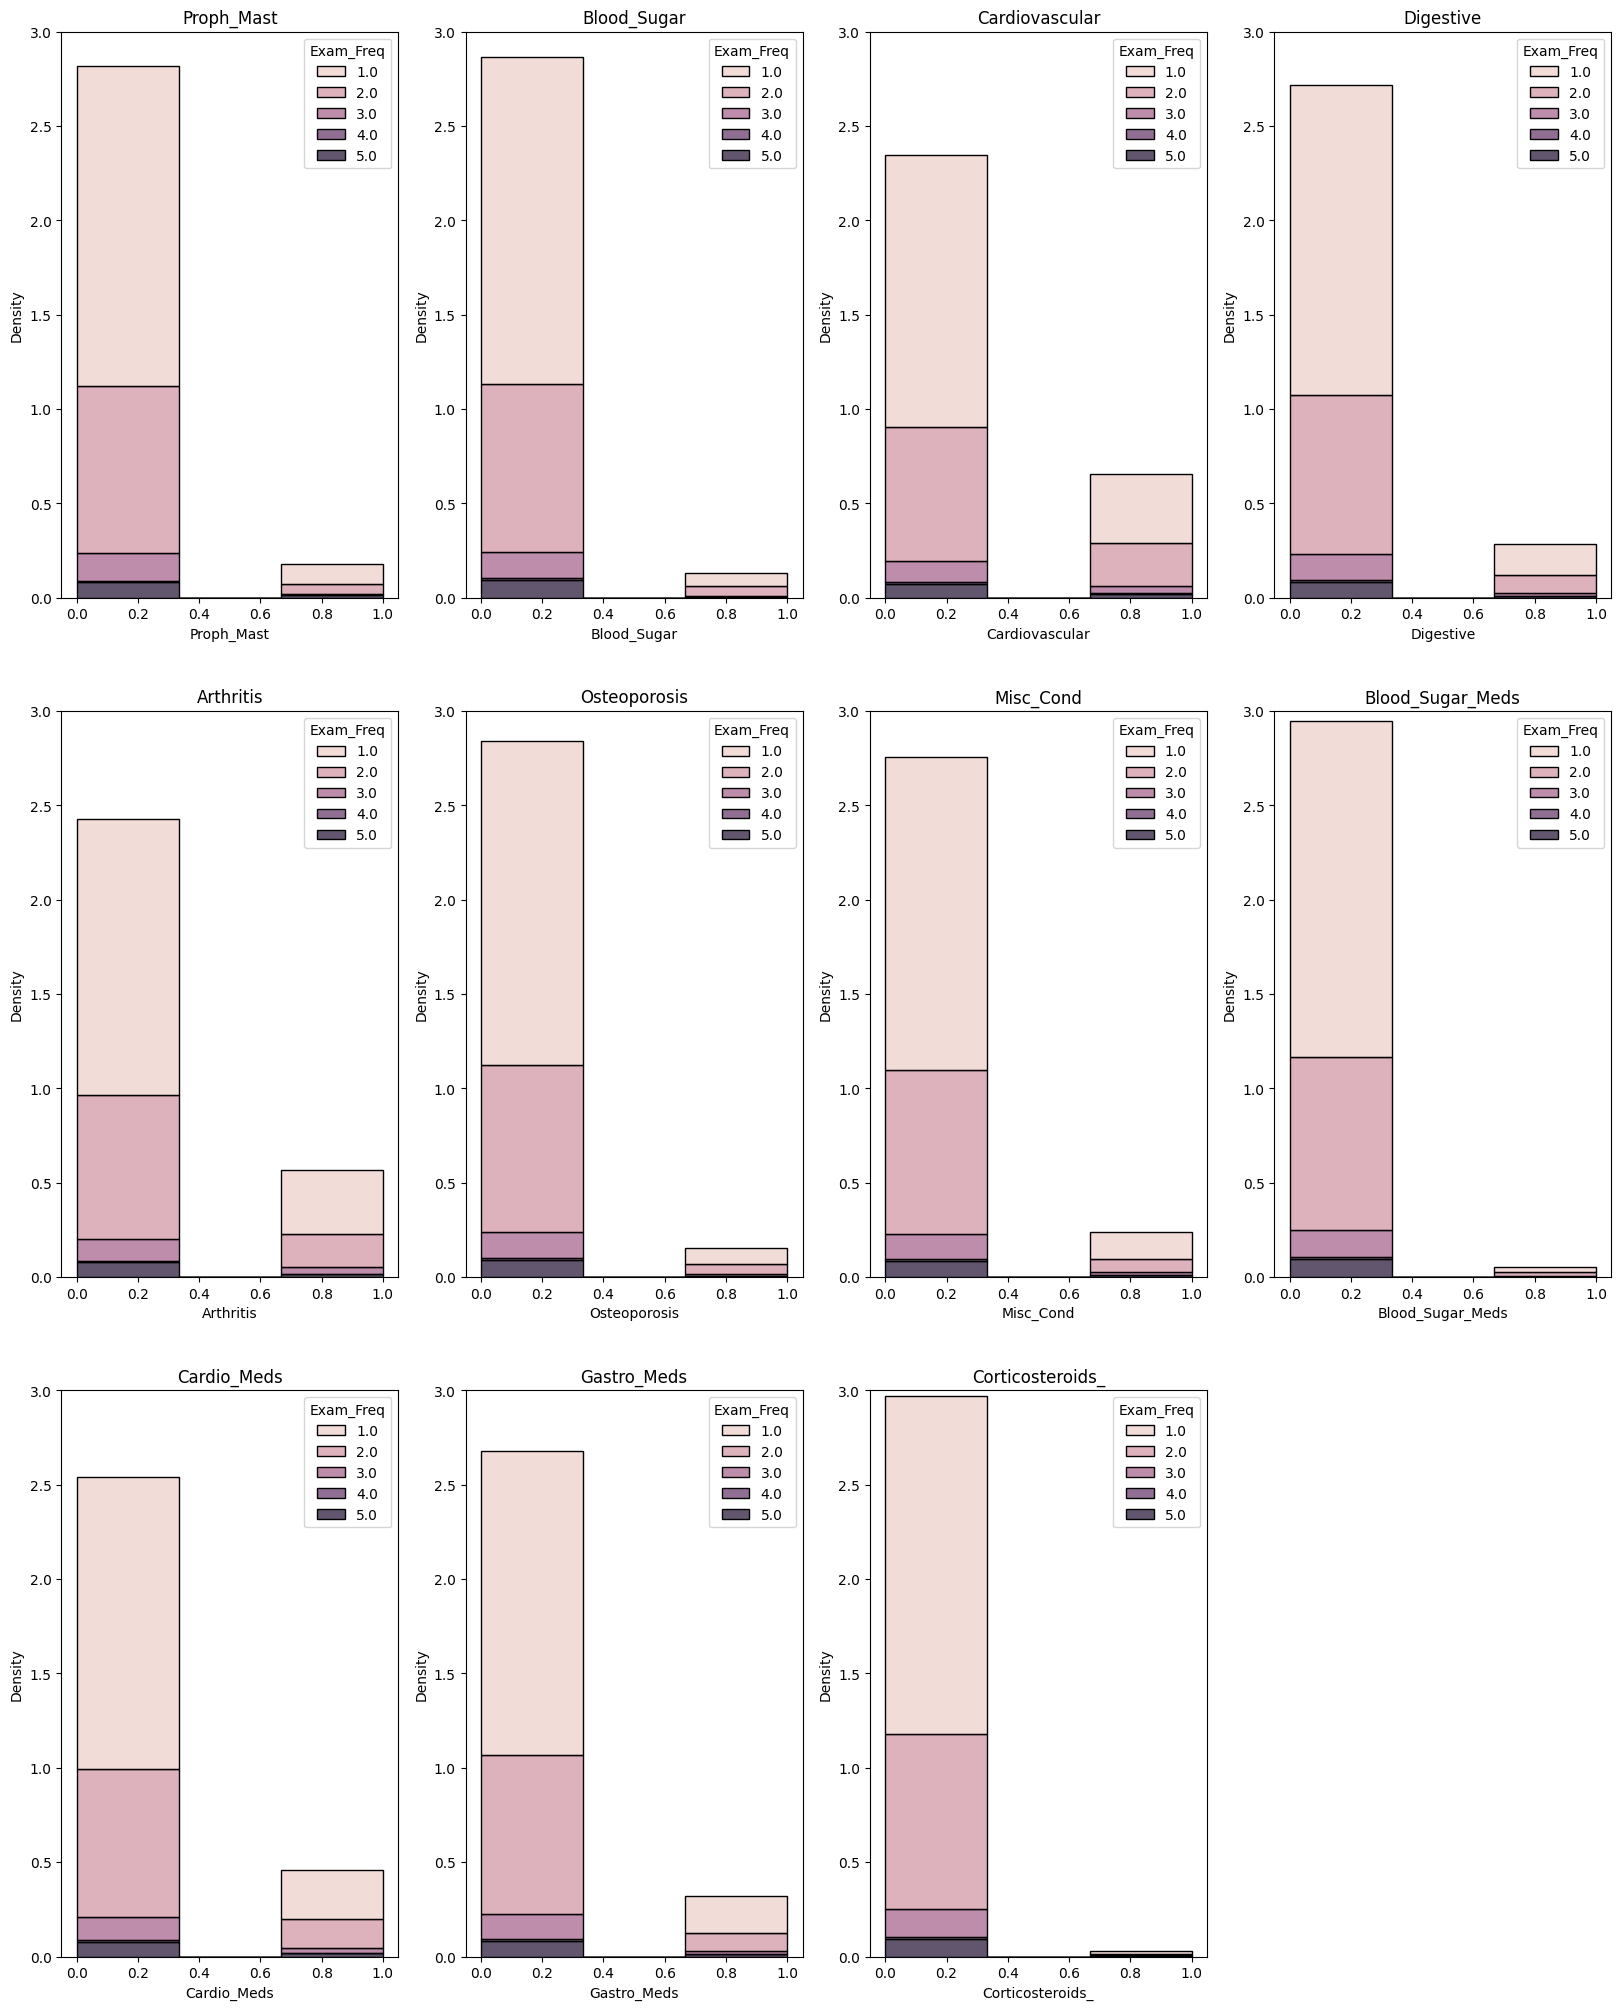

In [17]:
pos = 1
plt.figure(figsize=(20,25))
for col in b_status_clean.columns:
    if col not in ['ID', 'hospital_', 'Exam_Freq']:
        plt.subplot(3,4,pos)
        sns.histplot(data=b_status_clean, x=col, hue='Exam_Freq', stat='density', multiple='stack', bins=3)
        plt.ylim(0,3)
        plt.title(f"{col}")
        pos += 1

### Health Status Subsetting by Hospitalized 

#### Finding Hospitalized and Not Hospitalized Patient ID's

In [18]:
hospitalized = base_health_status[base_health_status.get('hospital_') == 1.]
not_hospitalized = base_health_status[(base_health_status.get('hospital_') == 0)]

# list of ids to use for other DFs
hospitalized_ids = np.array(hospitalized.get('ID'))
not_hospitalized_ids = np.array(not_hospitalized.get('ID'))

In [19]:
#cleaning DF for visualization
hospitalized_vis = hospitalized.set_index('ID').drop(columns = ['hospital_','Exam_Freq'] ,axis=1)
not_hospitalized_vis = not_hospitalized.set_index('ID').drop(columns=['hospital_', 'Exam_Freq'],axis=1)

#adding proportion
    #hospitalized
series1 = hospitalized_vis.sum()
hospitalized_vis_sums = series1.to_frame().rename(columns={0:"Counts"}).sort_values(by='Counts')
hospitalized_vis_sums = hospitalized_vis_sums.assign(Proportion = hospitalized_vis_sums.get('Counts')/hospitalized_vis.shape[0])

    #not hospitalized 
series2 = not_hospitalized_vis.sum()
not_hospitalized_vis_sums = series2.to_frame().rename(columns={0:"Counts"}).sort_values(by='Counts')
not_hospitalized_vis_sums = not_hospitalized_vis_sums.assign(Proportion = not_hospitalized_vis_sums.get('Counts')/not_hospitalized_vis.shape[0])

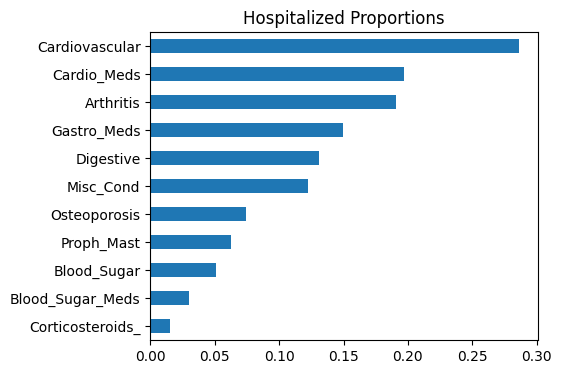

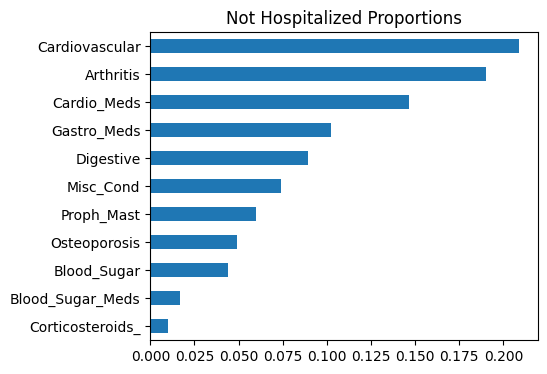

In [20]:
#hospitalized
hospitalized_vis_sums.get('Proportion').plot(kind='barh', figsize=(5,4))
plt.title('Hospitalized Proportions')
plt.show()

#not hospitalized
not_hospitalized_vis_sums.get('Proportion').plot(kind='barh', figsize=(5,4))
plt.title('Not Hospitalized Proportions')
plt.show()

### Health Status and Stage of Cancer

In [21]:
b_status_merge = b_status_clean.merge(b_measure_merge, left_on='ID', right_on='ID')
#check for duplicates of patients
b_status_merge.get('ID').duplicated().sum()

0

In [22]:
b_status_merge.columns

Index(['ID', 'hospital_', 'Exam_Freq', 'Proph_Mast', 'Blood_Sugar',
       'Cardiovascular', 'Digestive', 'Arthritis', 'Osteoporosis', 'Misc_Cond',
       'Blood_Sugar_Meds', 'Cardio_Meds', 'Gastro_Meds', 'Corticosteroids_',
       'Stage', 'Tumor Type'],
      dtype='object')

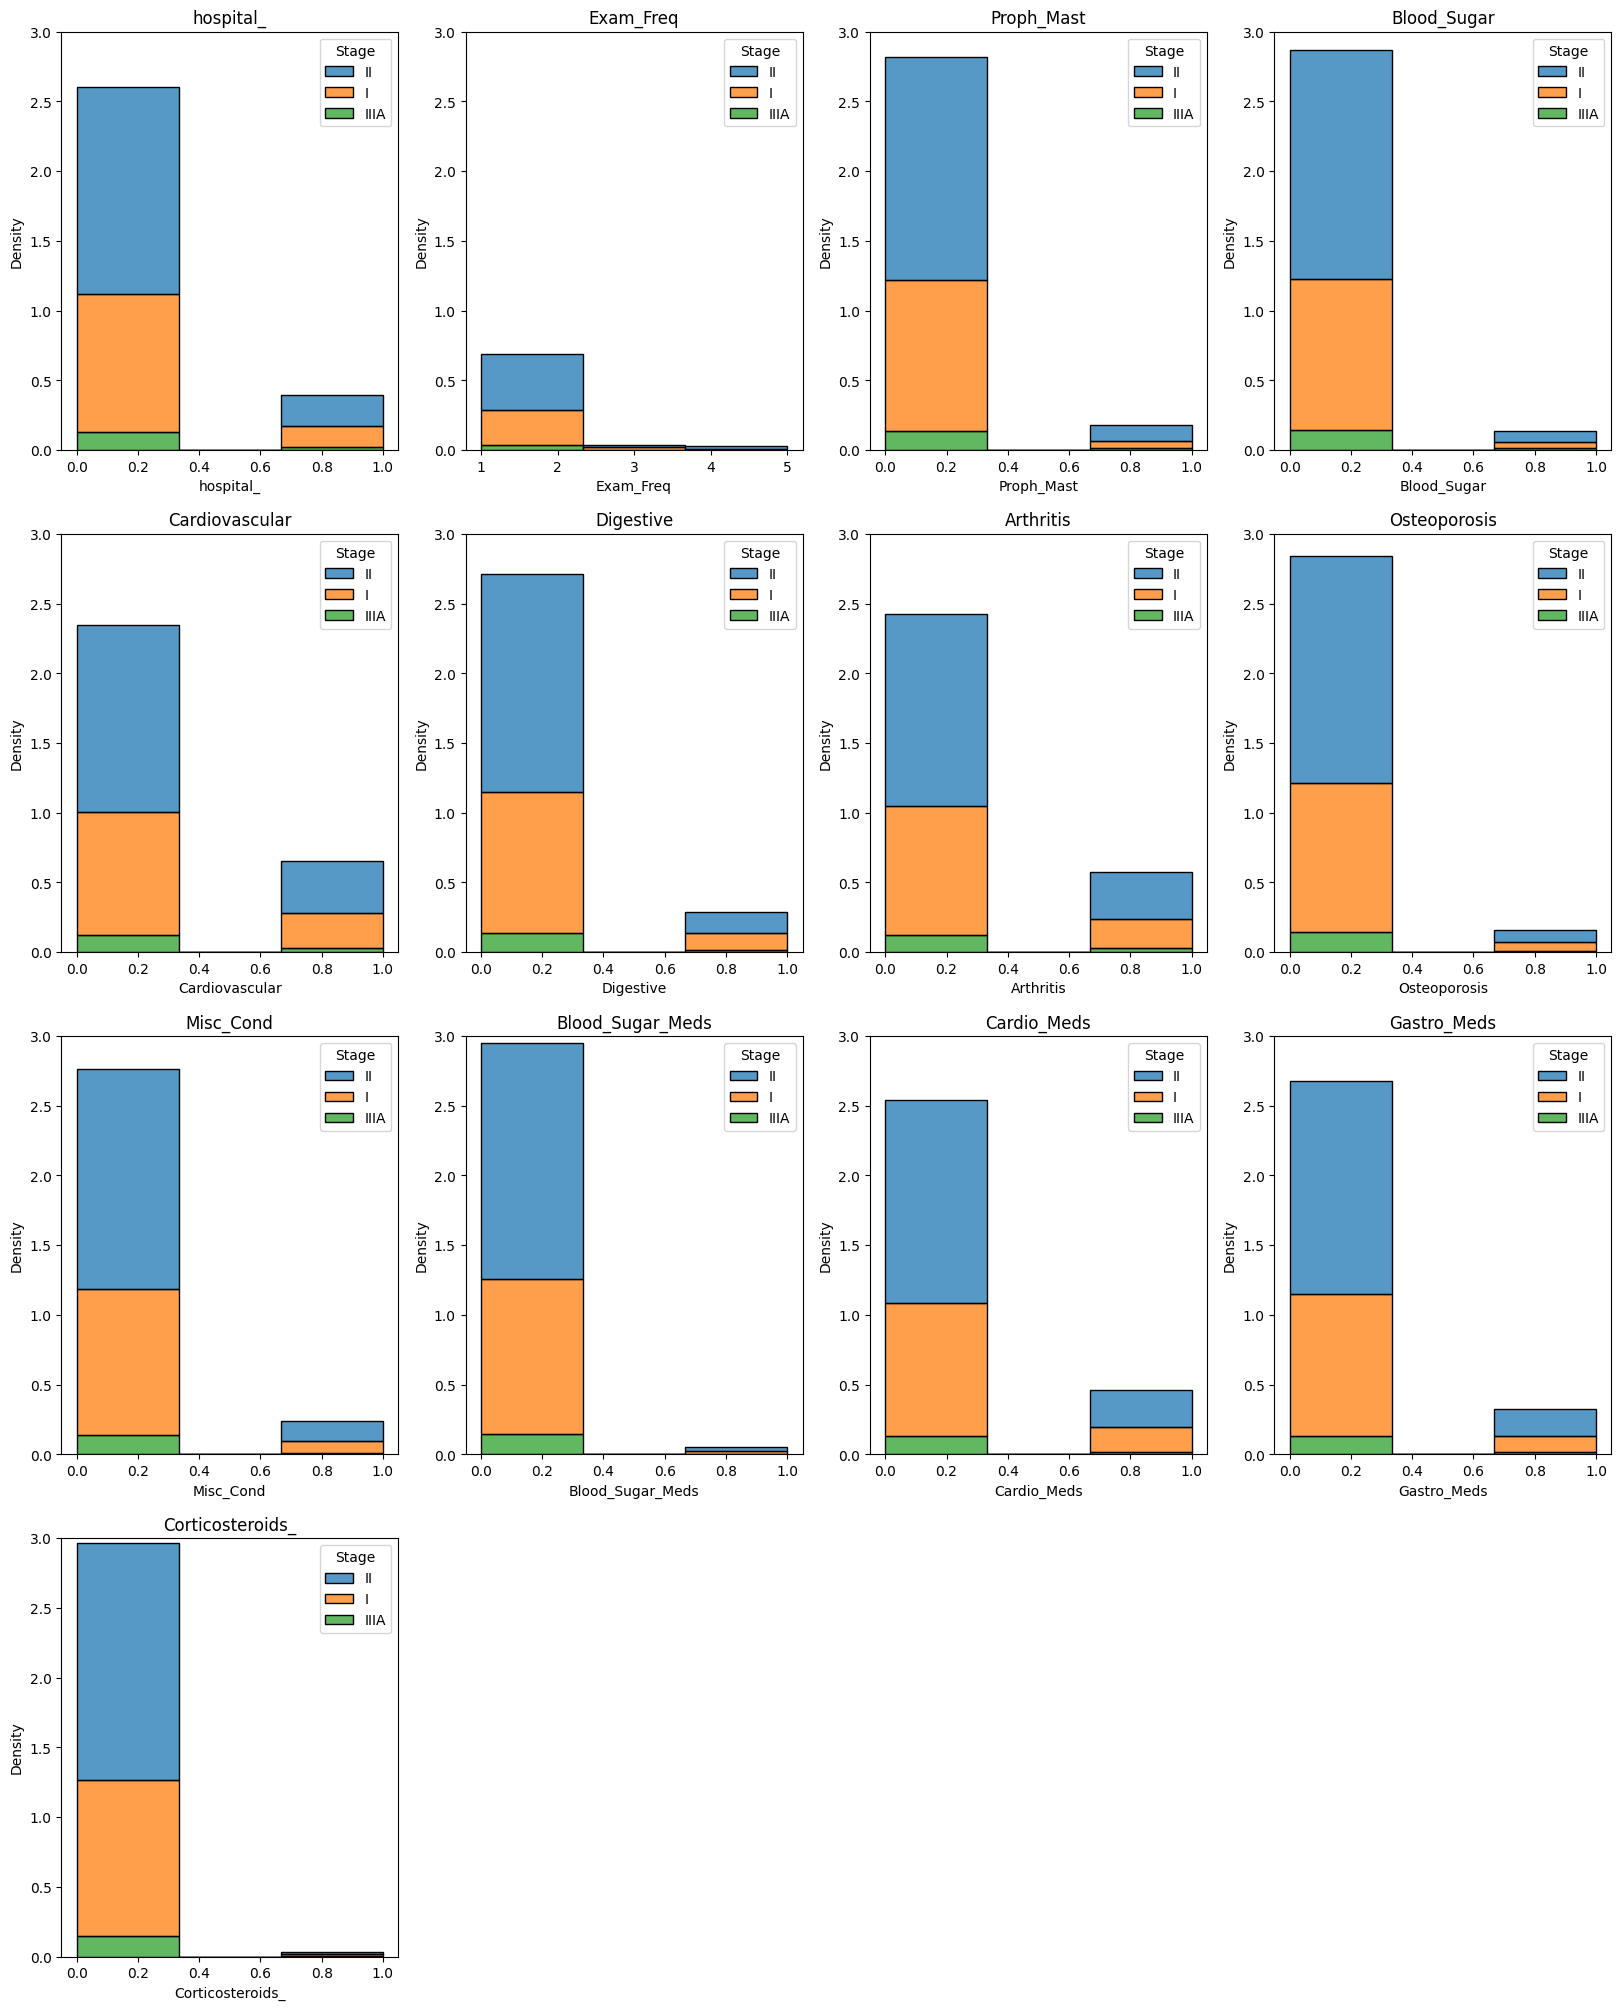

In [23]:
plt.figure(figsize=(20,25))
pos = 1
for col in b_status_clean.columns:
    if col not in ['ID', 'Stage', 'Tumor Type']:
        plt.subplot(4,4,pos)
        sns.histplot(data=b_status_merge, x=col, hue='Stage', stat='density', multiple='stack', bins=3)
        plt.ylim(0,3)
        plt.title(f"{col}")
        pos += 1

### Health Status and Tumor Type

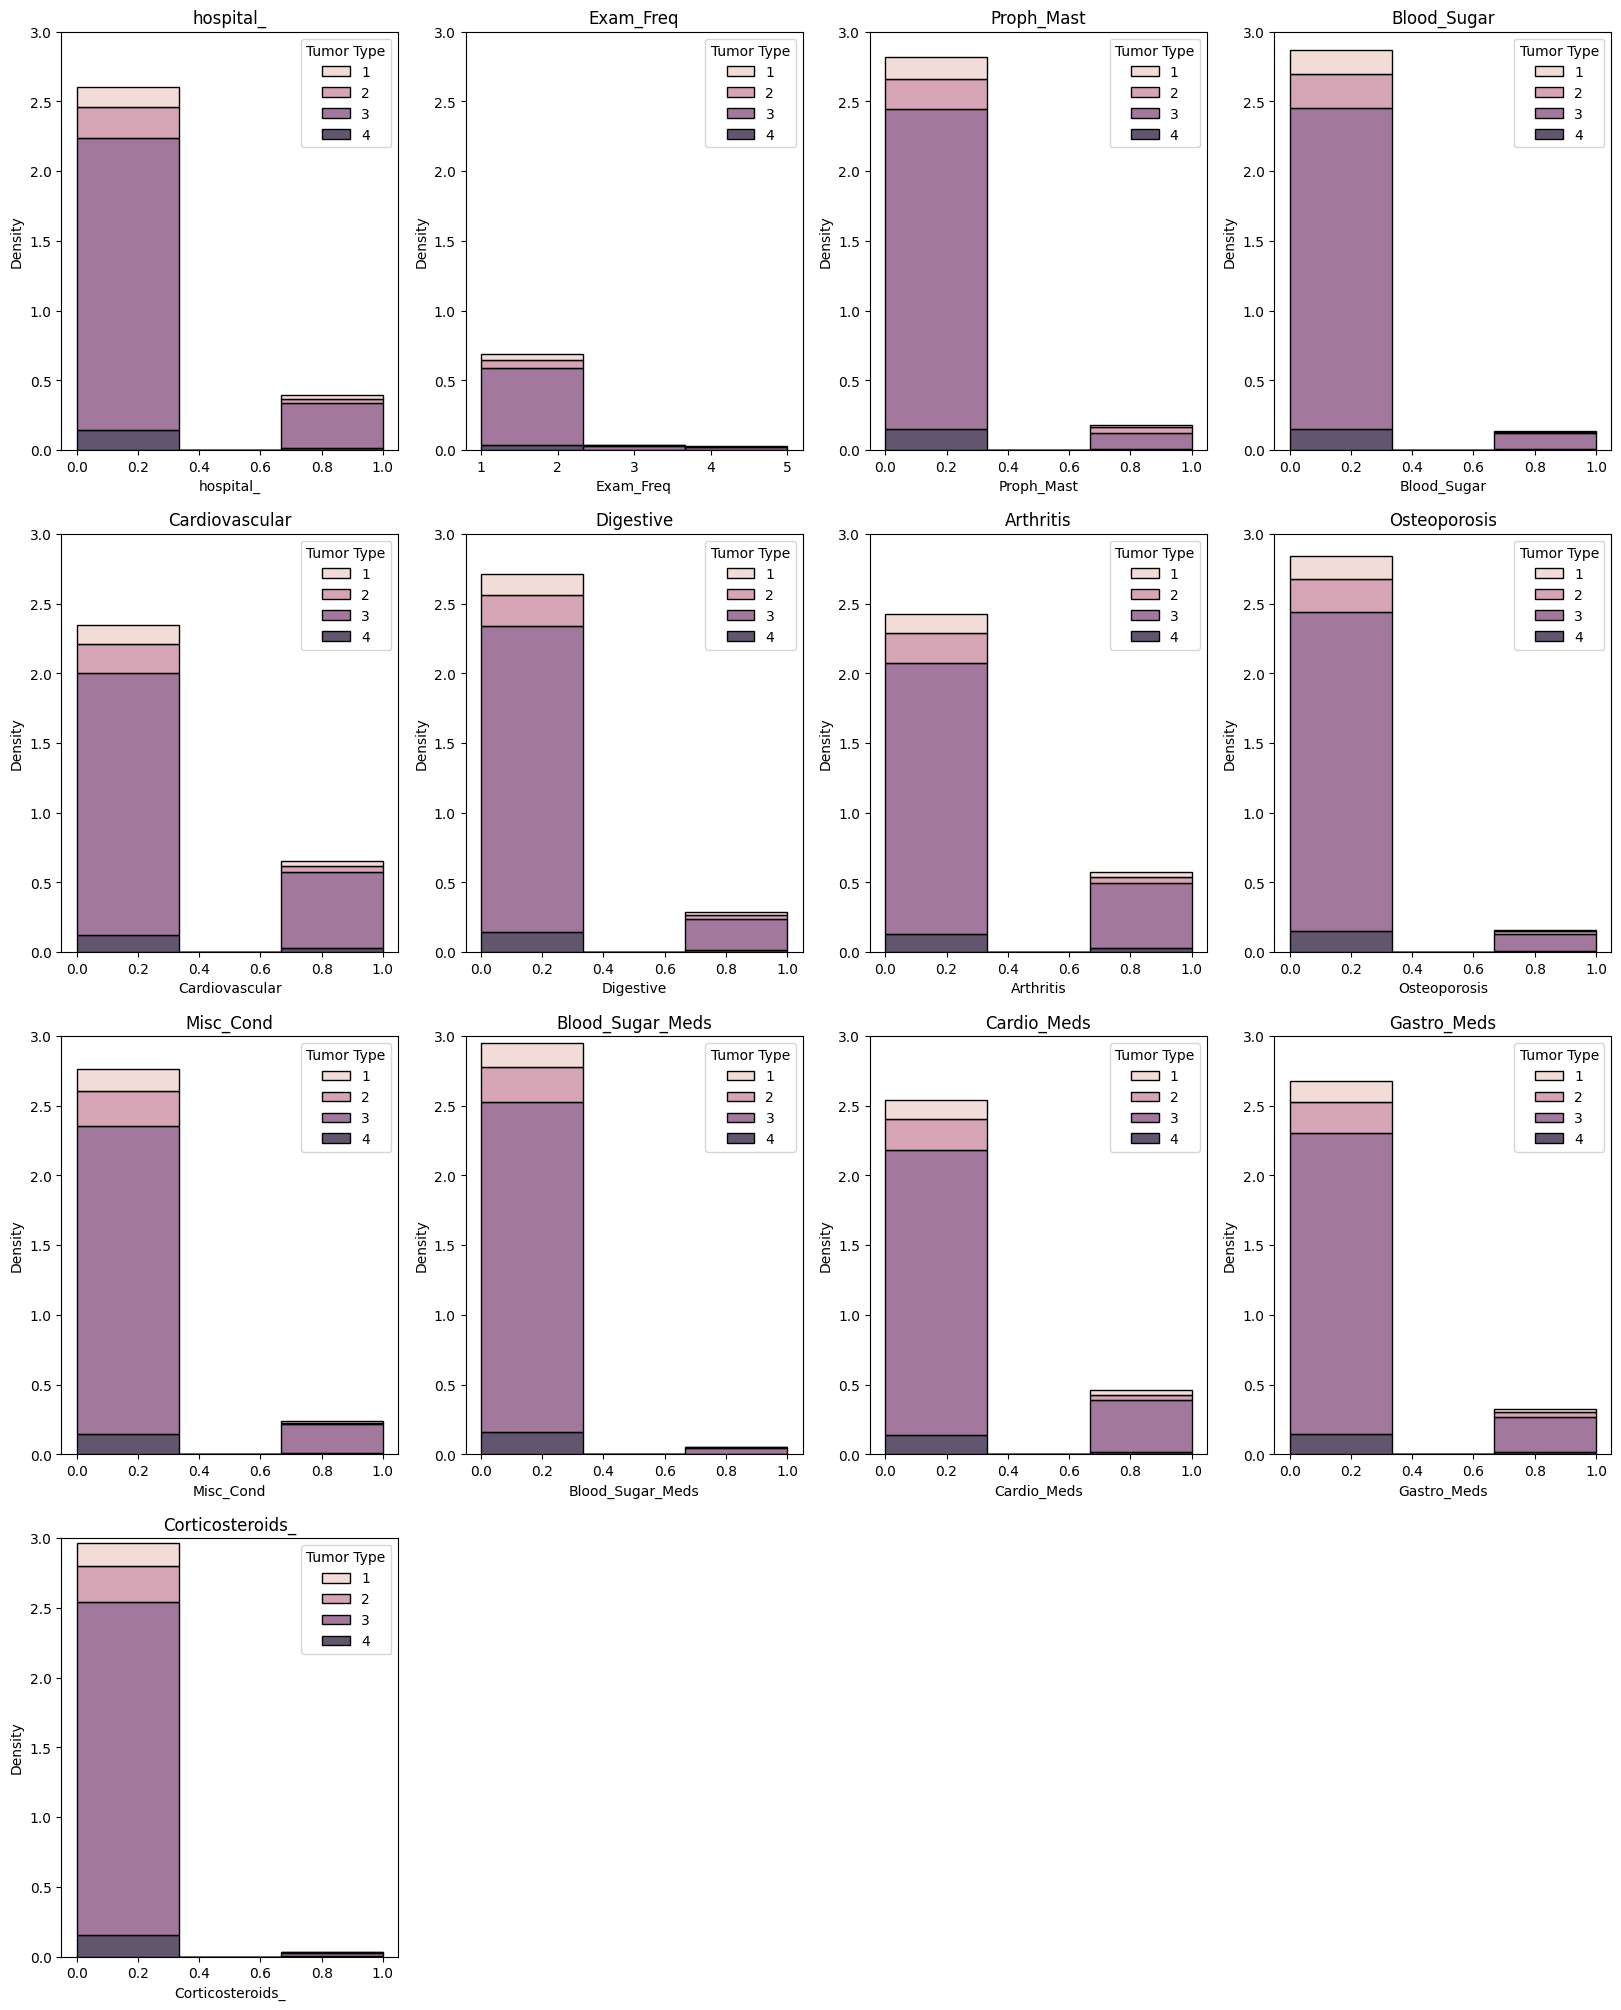

In [24]:
plt.figure(figsize=(20,25))
pos = 1
for col in b_status_clean.columns:
    if col not in ['ID', 'Stage', 'Tumor Type']:
        plt.subplot(4,4,pos)
        sns.histplot(data=b_status_merge, x=col, hue='Tumor Type', stat='density', multiple='stack', bins=3)
        plt.ylim(0,3)
        plt.title(f"{col}")
        pos += 1

## Demographics

### Cleaning

In [25]:
base_demo.isnull().sum() # no null val!

ID                0
age at dx         0
age at rand       0
Ethnicity         0
Education         0
Marital Status    0
Empl. Status      0
Yr Rand           0
dtype: int64

In [26]:
# dropping 'unknown' values on dataset
b_demo_clean = base_demo[(base_demo.get('Marital Status') != 6) & (base_demo.get('Empl. Status')!= 2)]
print(b_demo_clean.columns)
b_demo_clean.head()

Index(['ID', 'age at dx', 'age at rand', 'Ethnicity', 'Education',
       'Marital Status', 'Empl. Status', 'Yr Rand'],
      dtype='object')


ID  age at dx  age at rand  Ethnicity  Education  Marital Status  \
0  1002         38           39          1          5               2   
1  1003         51           53          1          8               2   
2  1005         50           54          3          5               2   
3  1007         53           54          1          9               2   
4  1008         47           48          1          7               2   

   Empl. Status  Yr Rand  
0             1     1995  
1             1     1995  
2             1     1995  
3             1     1995  
4             0     1995

#### Demographics and Age at Diagnosis

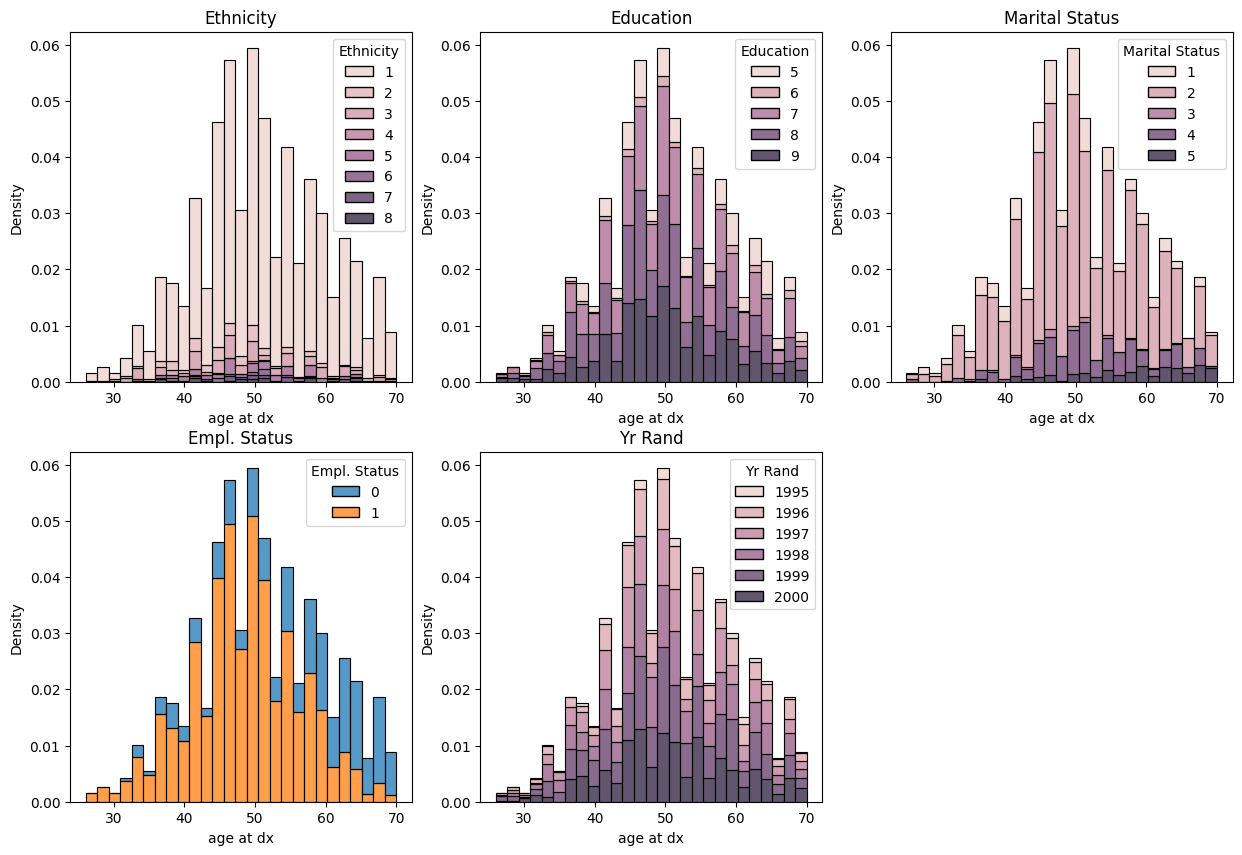

In [27]:
pos = 1
plt.figure(figsize=(15,10))
for col in b_demo_clean.columns:
    if col not in ['ID', 'age at dx', 'age at rand']:
        plt.subplot(2,3,pos)
        sns.histplot(data=b_demo_clean, x='age at dx', hue=col, stat='density', multiple='stack')
        plt.title(f'{col}')
        pos+=1 

### Demographics Subsetting by Hospitalized 

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [29]:
# hospitalized 
demo_hospitalized = base_demo[base_demo.get('ID') == -1]
for id in hospitalized_ids: 
    patient = base_demo[base_demo.get('ID') == id]
    demo_hospitalized = demo_hospitalized.append(patient)

#not hospitalized 
demo_not_hosp = base_demo[base_demo.get('ID') == -1]
for id in not_hospitalized_ids: 
    patient = base_demo[base_demo.get('ID') == id]
    demo_not_hosp = demo_not_hosp.append(patient)

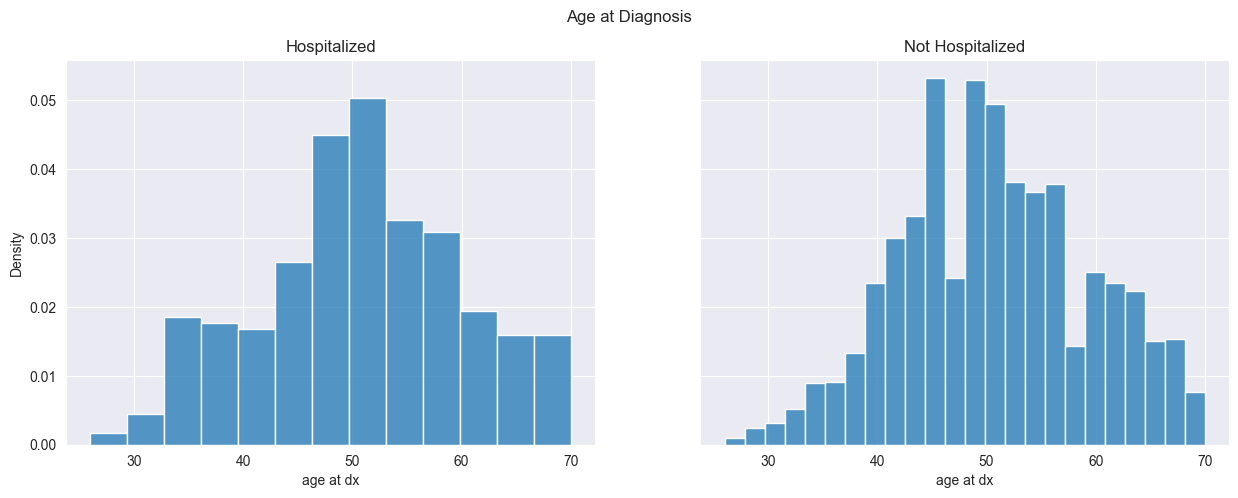

In [30]:
# age at diagnosis 

sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Age at Diagnosis')

sns.histplot(data = demo_hospitalized, x ='age at dx', ax=axes[0], stat='density')
axes[0].set_title("Hospitalized")


sns.histplot(data = demo_not_hosp, x ='age at dx', ax=axes[1], stat='density')
axes[1].set_title("Not Hospitalized")

plt.show()

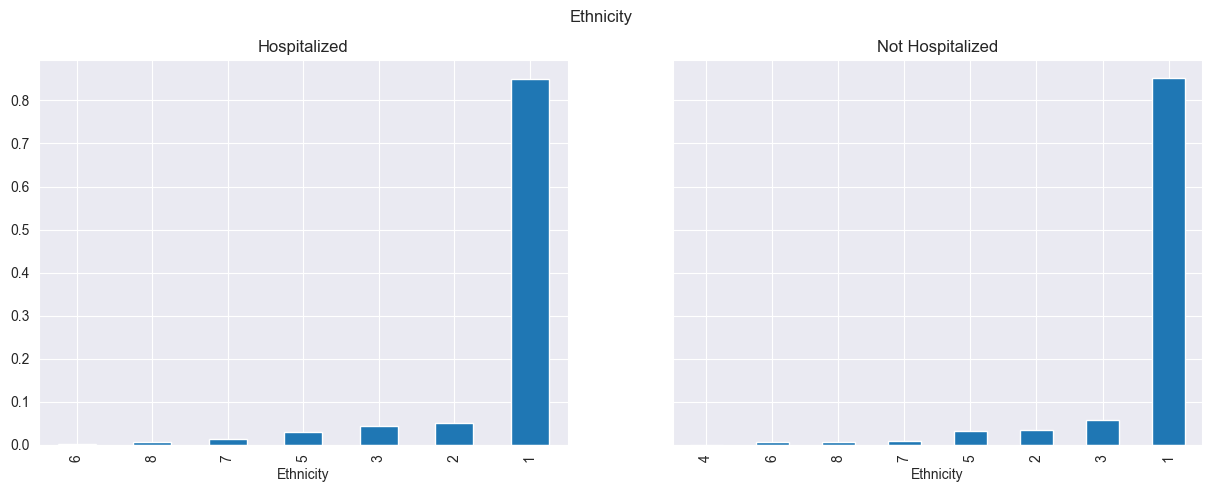

In [31]:
#ethnicity 
ethnic_hosp = demo_hospitalized.groupby('Ethnicity').count().sort_values(by='ID')
ethnic_not_hosp = demo_not_hosp.groupby('Ethnicity').count().sort_values(by='ID')

#proportion col 
ethnic_hosp = ethnic_hosp.assign(Proportion = ethnic_hosp.get('ID')/hospitalized.shape[0])
ethnic_not_hosp = ethnic_not_hosp.assign(Proportion = ethnic_not_hosp.get('ID')/not_hospitalized.shape[0])

#plotting
fig,axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Ethnicity')

ethnic_hosp.get('Proportion').plot(kind='bar', ax=axes[0])
axes[0].set_title("Hospitalized")


ethnic_not_hosp.get('Proportion').plot(kind='bar', ax=axes[1])
axes[1].set_title("Not Hospitalized")

plt.show()

**Key:** 
- 1: White, not Hispanic   
- 2: Black, not Hispanic  
- 3: Hispanic  
- 4: American Indian/Alaskan  
- 5: Asian  
- 6: Pacific Islander 
- 7: Mixed Race 8: Other 

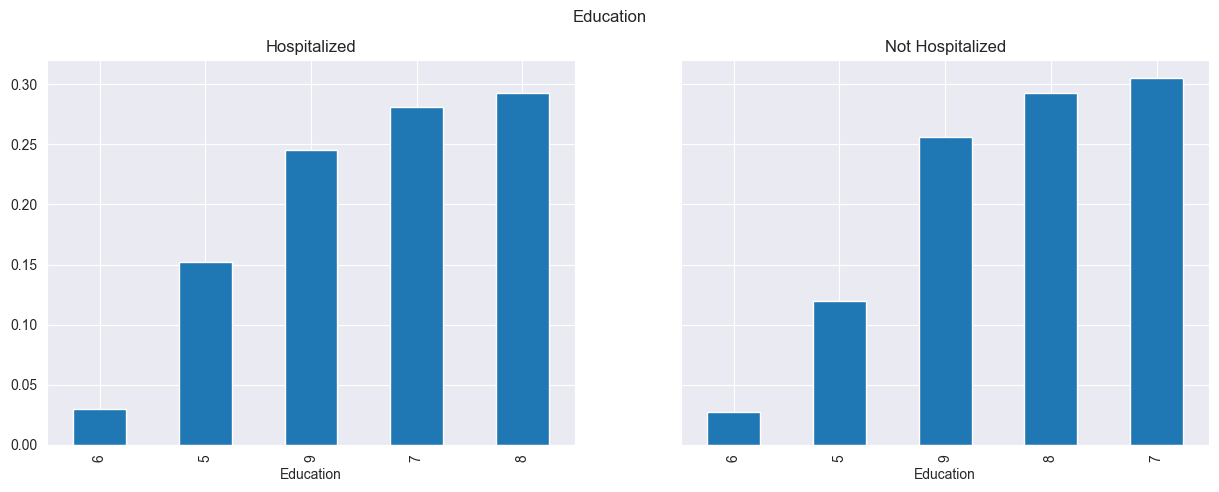

In [32]:
# education 
education_hosp = demo_hospitalized.groupby('Education').count().sort_values(by='ID')
education_not_hosp = demo_not_hosp.groupby('Education').count().sort_values(by='ID')

education_hosp = education_hosp.assign(Proportion = education_hosp.get('ID')/demo_hospitalized.shape[0])
education_not_hosp = education_not_hosp.assign(Proportion = education_not_hosp.get('ID')/demo_not_hosp.shape[0])

#plotting
fig,axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Education')

education_hosp.get('Proportion').plot(kind='bar', ax=axes[0])
axes[0].set_title("Hospitalized")


education_not_hosp.get('Proportion').plot(kind='bar', ax=axes[1])
axes[1].set_title("Not Hospitalized")

plt.show()

### Demographics and Stage of Cancer

In [33]:
b_demo_merge = b_demo_clean.merge(b_measure_merge,left_on='ID', right_on='ID')

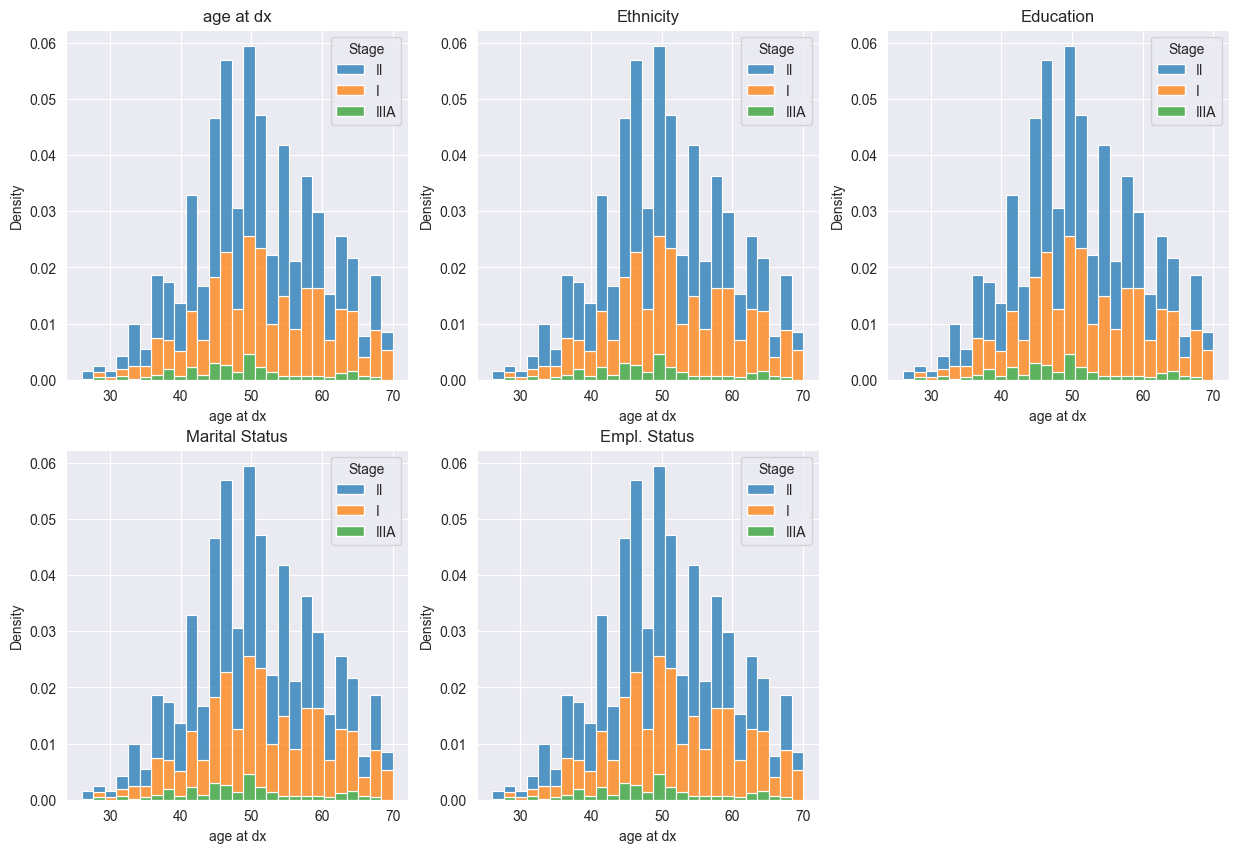

In [34]:
plt.figure(figsize=(15,10))
pos = 1
for col in b_demo_merge.columns:
    if col in ['age at dx', 'Ethnicity', 'Education', 'Marital Status', 'Empl. Status']:
        plt.subplot(2,3,pos)
        sns.histplot(data=b_demo_merge, x='age at dx', hue='Stage', stat='density', multiple='stack')
        plt.title(f'{col}')
        pos+=1 

### Demographics and Tumor Type

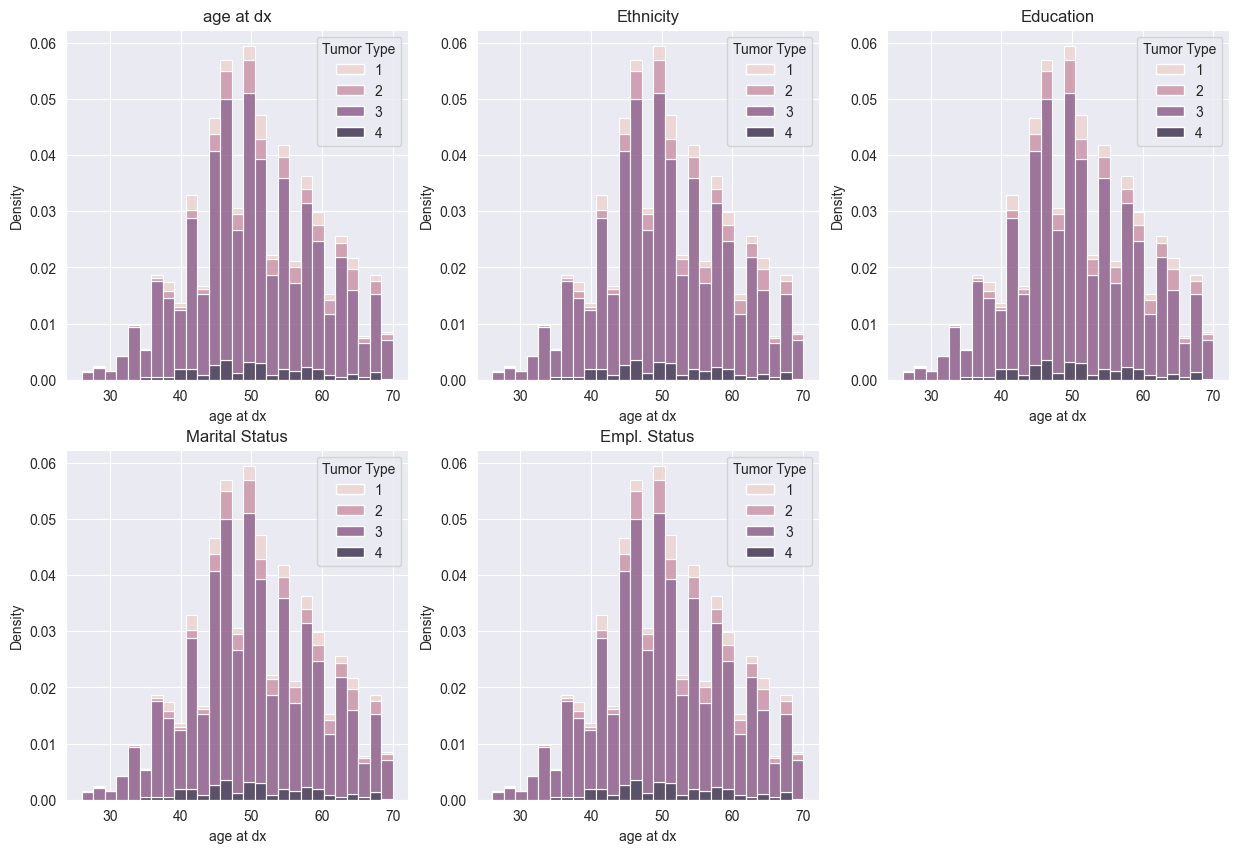

In [35]:
plt.figure(figsize=(15,10))
pos = 1
for col in b_demo_merge.columns:
    if col in ['age at dx', 'Ethnicity', 'Education', 'Marital Status', 'Empl. Status']:
        plt.subplot(2,3,pos)
        sns.histplot(data=b_demo_merge, x='age at dx', hue='Tumor Type', stat='density', multiple='stack')
        plt.title(f'{col}')
        pos+=1 

## Food From NDS

### Cleaning

In [36]:
# null vals
b_foodnds_clean = base_foodnds.dropna()

In [37]:
# outliers 
outlier_col = ['Kcal', 'Protein(g', 'Total Fat',
       'Total Carb', 'Alcohol', '% Protein', '% Fat', '% Carb', '% Alcohol',
       'Caffeine', 'Calcium', 'Iron', 'Magnesium', 'Phosphorus', 'Potassium',
       'Sodium', 'Zinc', 'Copper', 'Selenium', 'Total Vit A', 'Retinol',
       'Alpha-Toc Eq', 'alpha-Toc', 'Gamma-Toc', 'Vit D', 'Vitamin C',
       'Thiamin', 'Riboflavin', 'Niacin', 'Folacin', 'Panto. Acid', 'Vit B6',
       'Vit B12', 'Cholesterol', 'Total SFA', 'Total MFA', 'Total PFA',
       '% SFA', '%MFA', '% PFA', 'PFA 18:2', 'PFA 18:3', 'PFA 20:5',
       'PFA 22:6', 'Diet Fiber', 'Soluble Fiber', 'Insol. Fiber', 'Starch',
       'Sucrose', 'Galactose', 'Fructose', 'Lactose', 'Maltose', 'Water',
       'Anim. Protein', 'Veg Prot', 'Vit K', 'Trans Fat Acids', 'Beta-Carot',
       'Alpha-Carot', 'Beta-Cryptox', 'Lut + Zeax', 'Lycopene', 'Green Veg',
       'Iceber', 'Tomato', 'Orange Veg', 'Other Veg', 'Wh. Pota',
       'Veg_woJ,PI,Iceberg', 'VJ', 'Legume', 'Soy Legume', 'Citrus', 'Berry',
       'Melon', 'Other Fruit', 'FJ', 'Fruit_noJ', 'Whole Grain',
       'Refined Grain']

q1 = b_foodnds_clean[outlier_col].quantile(0.25)
q3 = b_foodnds_clean[outlier_col].quantile(0.75)
iqr = (q3 - q1)

b_foodnds_clean = b_foodnds_clean[~((b_foodnds_clean[outlier_col] < (q1 - 1.5 * iqr)) |(b_foodnds_clean[outlier_col] > (q3 + 1.5 * iqr))).any(axis=1)]
b_foodnds_clean.head()

ID  Recalls  last date  Kcal Protein(g Total Fat Total Carb Alcohol  \
0  1002      4.0 1994-12-16  1373        55      35.2        218       0   
2  1005      4.0 1995-02-06  1355      49.7      45.3        195       0   
3  1007      4.0 1995-01-26  1110      60.3        32        143     2.6   
4  1008      4.0 1995-01-23  1503      63.2      61.3        176     2.7   
6  1010      4.0 1995-04-03  1047      53.3      27.9        156       0   

   % Protein      % Fat  ... Legume Soy Legume Citrus Berry Melon Other Fruit  \
0  15.598059  22.828404  ...   0.28          0      0  0.08     0         1.8   
2  14.655364  29.549443  ...      0          0    0.7     0   0.2        1.53   
3  21.624958  26.037579  ...      0          0   0.45     0     0        0.05   
4  17.356841   37.52792  ...   0.33          0   0.28     0     0        1.78   
6   20.10969  24.776498  ...   0.25       0.38   0.75  0.03  0.43         1.6   

     FJ Fruit_noJ Whole Grain Refined Grain  
0  0.95      1.88        0.98          1.53  
2  0.88      2.43         0.6          1.73  
3   1.3       0.5        0.43          2.45  
4     0      2.05         0.6          2.88  
6     0       2.8        0.73          1.23  

[5 rows x 84 columns]

### Distribution - Cancer Stage

In [38]:
b_foodnds_cleanmerge = b_foodnds_clean.merge(b_measure_merge, left_on='ID', right_on='ID')

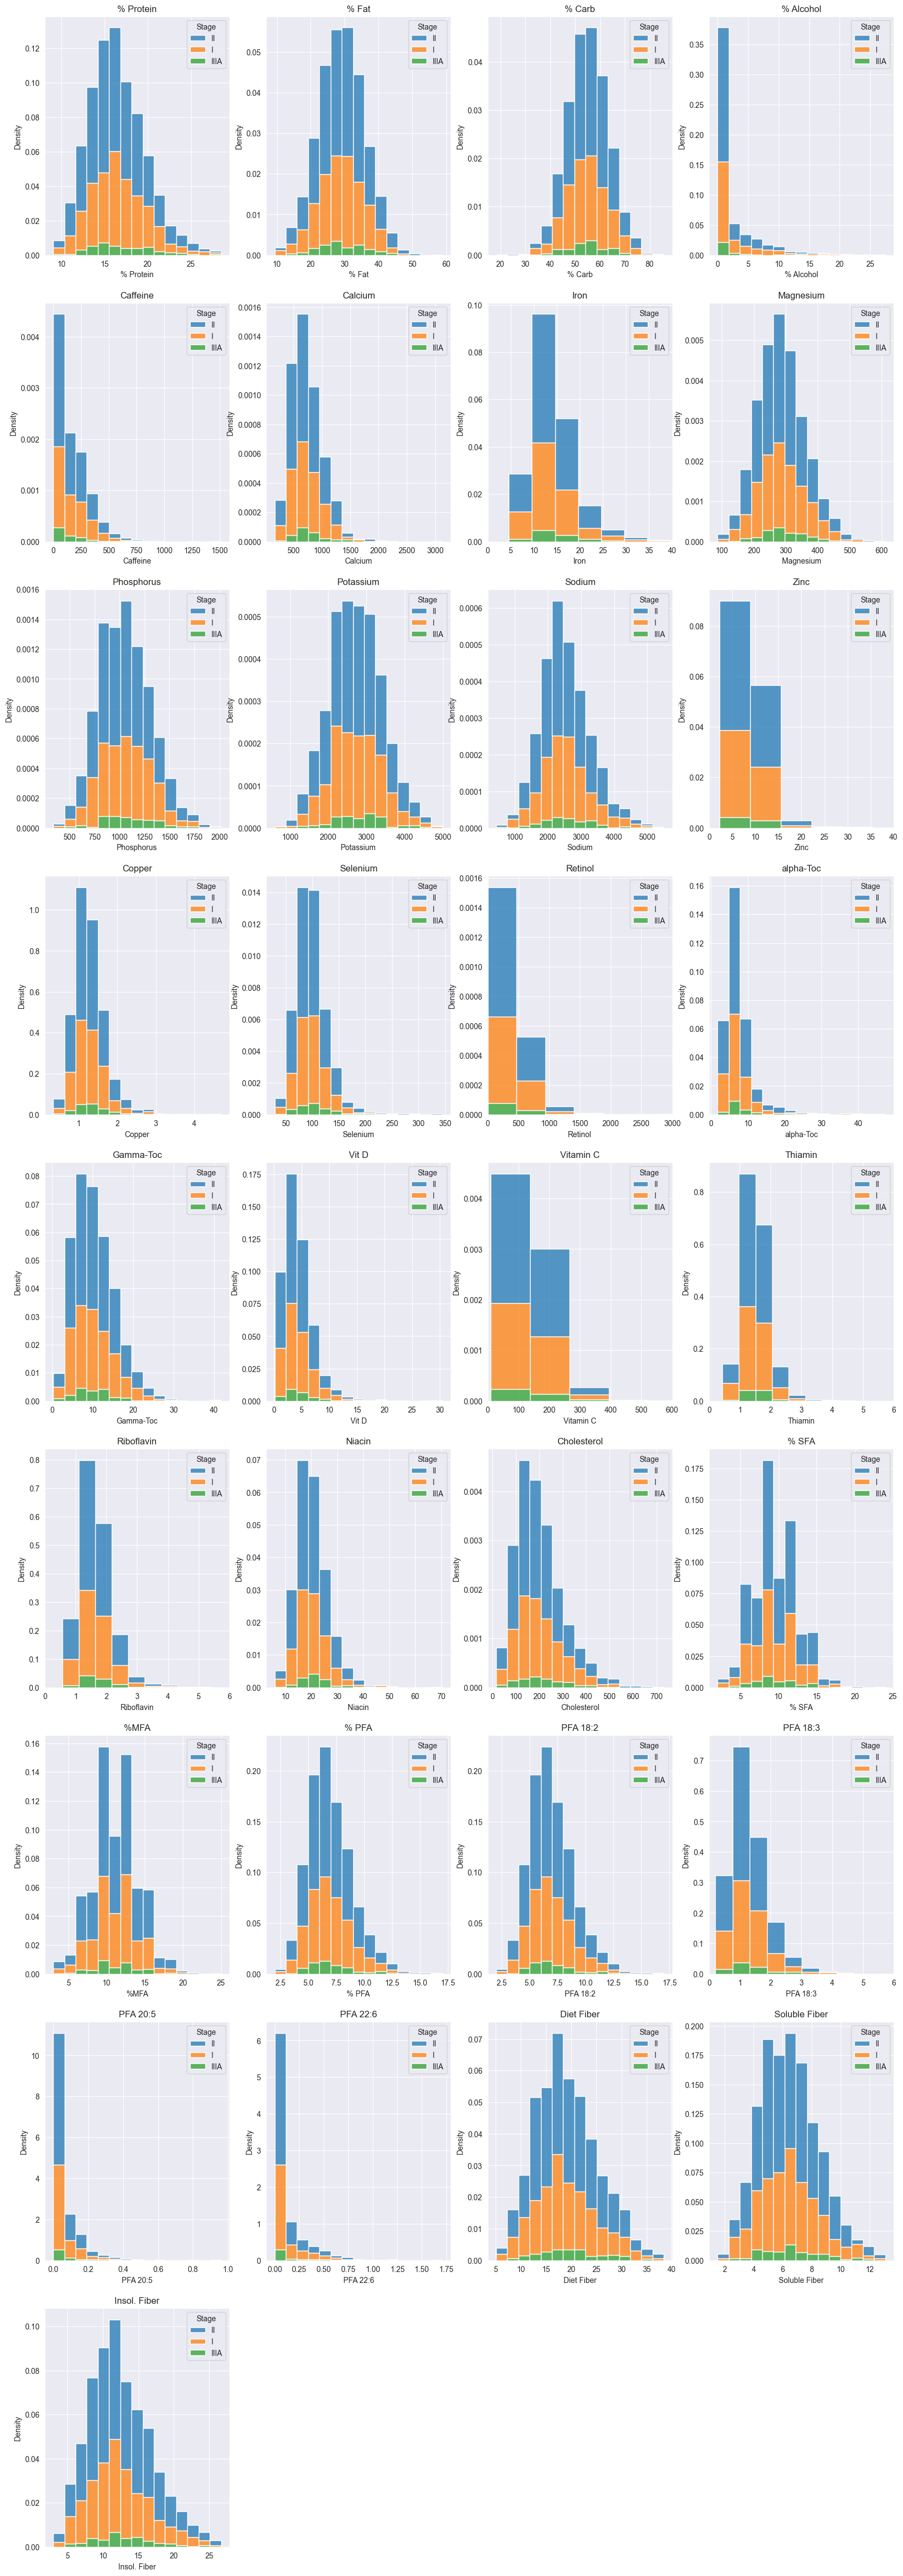

In [39]:
pos = 1
plt.figure(figsize=(20,60))
for col in b_foodnds_cleanmerge.columns:
    if col in ['% Protein', '% Fat', '% Carb', '% Alcohol','Caffeine', 'Calcium', 'Iron', 'Magnesium',
       'Phosphorus', 'Potassium','Sodium', 'Zinc', 'Copper', 'Selenium', 'Retinol','alpha-Toc', 'Gamma-Toc',
       'Vit D', 'Vitamin C','Thiamin', 'Riboflavin', 'Niacin', 'Cholesterol','% SFA',
       '%MFA', '% PFA', 'PFA 18:2', 'PFA 18:3', 'PFA 20:5','PFA 22:6','Diet Fiber', 'Soluble Fiber', 'Insol. Fiber']:
        plt.subplot(9,4,pos)
        sns.histplot(data=b_foodnds_cleanmerge, hue='Stage', x=col, stat='density', multiple='stack', bins=15)
        plt.title(f'{col}')
        pos+=1
        if col in ['Zinc', 'Iron']:
            plt.xlim(0,40)
        if col in ['Retinol']:
            plt.xlim(0,3000)
        if col in ['Vitamin C']:
            plt.xlim(0,600)
        if col in ['Riboflavin', 'PFA 18:3','Thiamin']:
            plt.xlim(0,6)

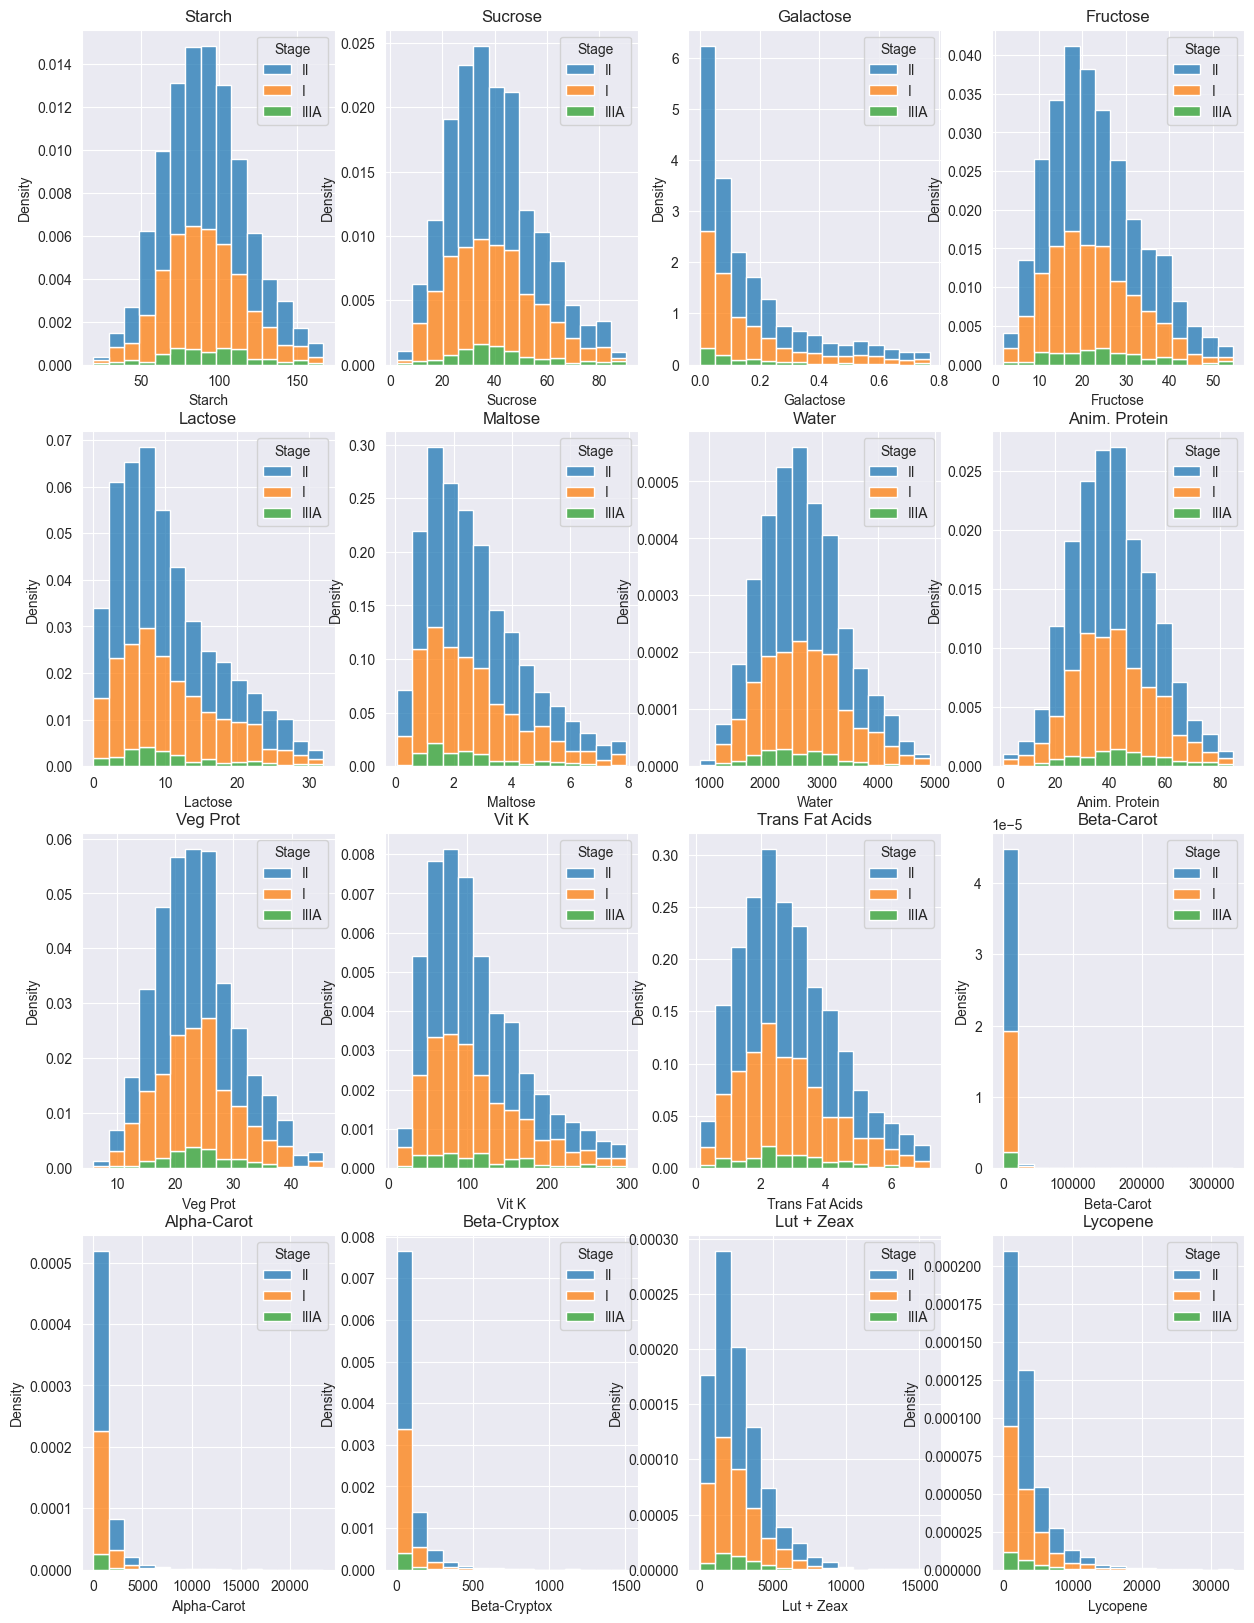

In [40]:
pos = 1
plt.figure(figsize=(15,20))
for col in b_foodnds_cleanmerge.columns:
    if col in ['Starch','Sucrose', 'Galactose', 'Fructose', 'Lactose', 'Maltose', 'Water','Anim. Protein',
               'Veg Prot', 'Vit K', 'Trans Fat Acids', 'Beta-Carot','Alpha-Carot', 'Beta-Cryptox', 'Lut + Zeax','Lycopene']:
        plt.subplot(4,4,pos)
        sns.histplot(data=b_foodnds_cleanmerge, hue='Stage', x=col, stat='density', multiple='stack', bins=15)
        plt.title(f'{col}')
        pos+=1

### Distribution - Tumor Type 

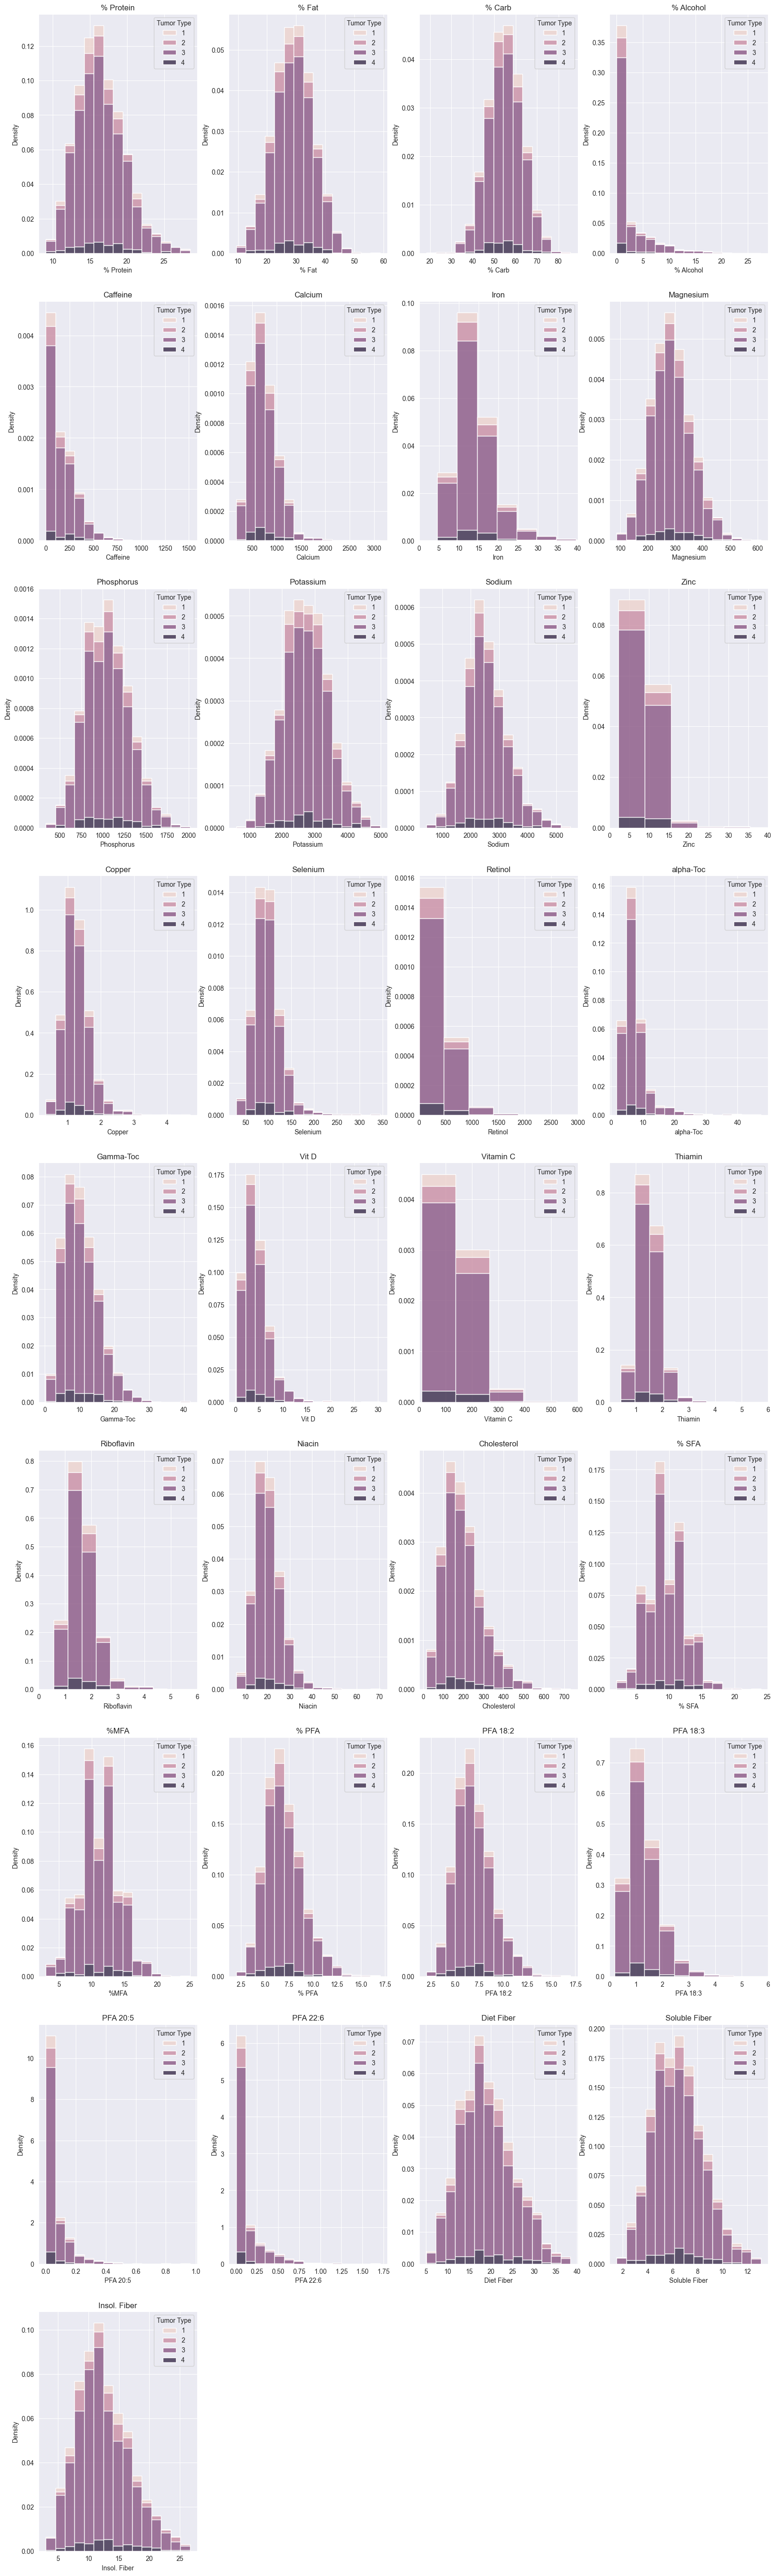

In [41]:
pos = 1
plt.figure(figsize=(20,70))
for col in b_foodnds_cleanmerge.columns:
    if col in ['% Protein', '% Fat', '% Carb', '% Alcohol','Caffeine', 'Calcium', 'Iron', 'Magnesium',
       'Phosphorus', 'Potassium','Sodium', 'Zinc', 'Copper', 'Selenium', 'Retinol','alpha-Toc', 'Gamma-Toc',
       'Vit D', 'Vitamin C','Thiamin', 'Riboflavin', 'Niacin', 'Cholesterol','% SFA',
       '%MFA', '% PFA', 'PFA 18:2', 'PFA 18:3', 'PFA 20:5','PFA 22:6','Diet Fiber', 'Soluble Fiber', 'Insol. Fiber']:
        plt.subplot(9,4,pos)
        sns.histplot(data=b_foodnds_cleanmerge, hue='Tumor Type', x=col, stat='density', multiple='stack', bins=15)
        plt.title(f'{col}')
        pos+=1
        if col in ['Zinc', 'Iron']:
            plt.xlim(0,40)
        if col in ['Retinol']:
            plt.xlim(0,3000)
        if col in ['Vitamin C']:
            plt.xlim(0,600)
        if col in ['Riboflavin', 'PFA 18:3','Thiamin']:
            plt.xlim(0,6)

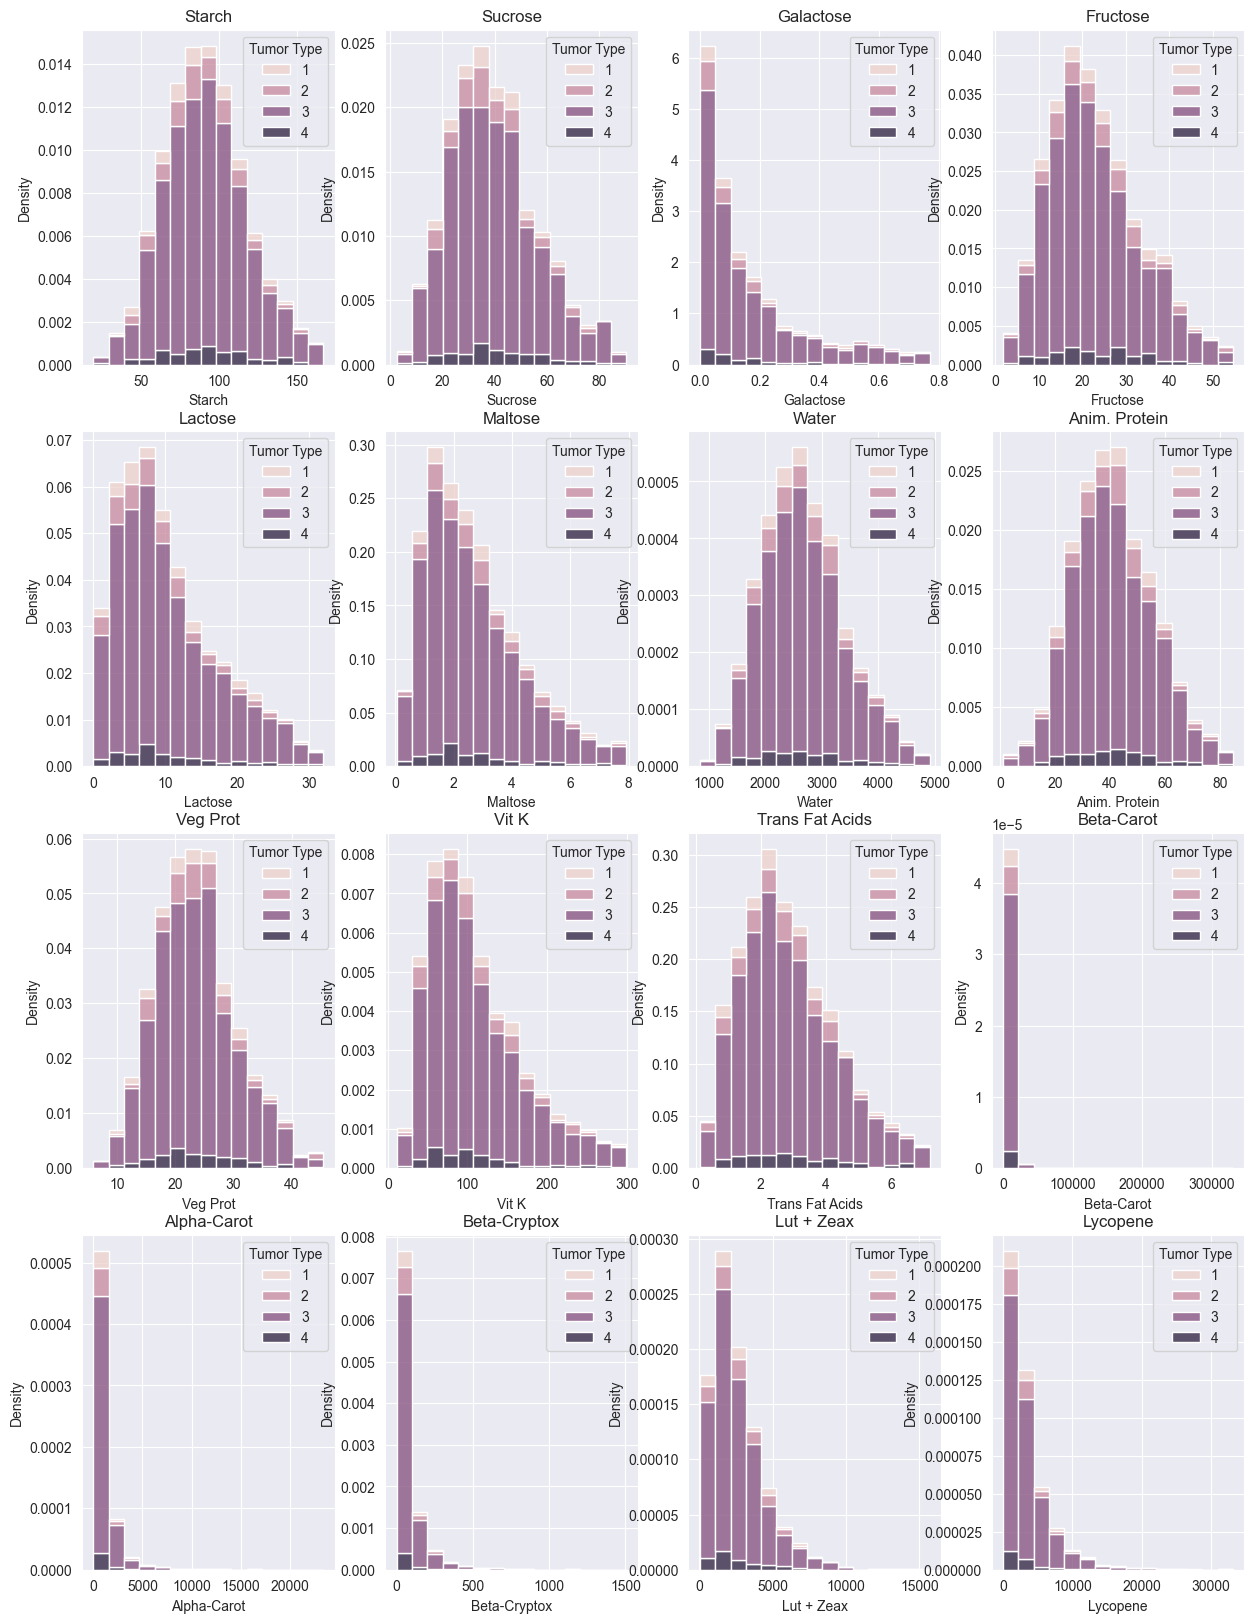

In [42]:
pos = 1
plt.figure(figsize=(15,20))
for col in b_foodnds_cleanmerge.columns:
    if col in ['Starch','Sucrose', 'Galactose', 'Fructose', 'Lactose', 'Maltose', 'Water','Anim. Protein',
               'Veg Prot', 'Vit K', 'Trans Fat Acids', 'Beta-Carot','Alpha-Carot', 'Beta-Cryptox', 'Lut + Zeax','Lycopene']:
        plt.subplot(4,4,pos)
        sns.histplot(data=b_foodnds_cleanmerge, hue='Tumor Type', x=col, stat='density', multiple='stack', bins=15)
        plt.title(f'{col}')
        pos+=1

### Subsetting Hospitalized/Not

In [43]:
# hospitalized 
base_foodnds_hosp = base_foodnds[base_foodnds.get('ID') == -1]
for id in hospitalized_ids: 
    patient = base_foodnds[base_foodnds.get('ID') == id]
    base_foodnds_hosp = base_foodnds_hosp.append(patient)

#not hospitalized 
base_foodnds_not_hosp = base_foodnds[base_foodnds.get('ID') == -1]
for id in not_hospitalized_ids: 
    patient = base_foodnds[base_foodnds.get('ID') == id]
    base_foodnds_not_hosp = base_foodnds_not_hosp.append(patient)

## Medial/Clinic Measurements

### Cleaning

In [44]:
# drop null vals
b_measure_clean = base_measure.dropna()

# drop unknown vals from documentation 
b_measure_clean = b_measure_clean[(b_measure_clean.get("Lump/Mast") != 3) &
                                 (b_measure_clean.get('Radiation') != 3) &
                                 (b_measure_clean.get('Chemo') != 3) &
                                 (b_measure_clean.get('Estr Recep') != 3) & 
                                 (b_measure_clean.get('Prog Recep') != 3) & 
                                 (b_measure_clean.get('Node Exam') != -9) & 
                                 (b_measure_clean.get('Node Pos') != -9) &
                                 (b_measure_clean.get('Pulse') != -9) & 
                                 (b_measure_clean.get('Bld Pres -Sys') != -9) &
                                 (b_measure_clean.get('Bld Pres - Dias') != -9) &
                                 (b_measure_clean.get('Menopause') != 5) &
                                 (b_measure_clean.get('Anti-Estr Use') != 4) &
                                 (b_measure_clean.get('Anti-Estro Type') != 5)]

# other 'weird' vals + potential outliers 
b_measure_clean = b_measure_clean[b_measure_clean.get('Tumor Size') != ' ']
b_measure_clean = b_measure_clean[b_measure_clean.get('Node Pos') != 39.]
b_measure_clean = b_measure_clean[b_measure_clean.get('Node Pos') < 20]

print(b_measure_clean.shape)
b_measure_clean.head()

(1679, 22)


ID  Lump/Mast  Radiation  Chemo  Tumor Type  Estr Recep  Prog Recep  \
221  1245          1          2      1           3           1           1   
224  1248          2          1      2           3           1           1   
225  1249          1          2      1           3           1           1   
226  1250          2          1      1           3           1           1   
229  1253          2          2      2           3           1           1   

     Node Exam  Node Pos Stage  ... Weight      BMI  Waist    Hip  Pulse  \
221         12       0.0     I  ...   61.6  24.3661   74.3   99.5     32   
224         15       0.0    II  ...   61.2  20.8174   69.2   96.0     33   
225         15       0.0     I  ...   60.4  23.1575   71.5   95.1     33   
226         13       0.0     I  ...   45.3  15.9740   61.0   86.5     30   
229         14       0.0     I  ...   78.6  30.2477   90.5  109.0     32   

     Bld Pres -Sys  Bld Pres - Dias  Menopause  Anti-Estr Use  Anti-Estro Type  
221            135               66          2              1                1  
224            109               71          3              1                1  
225            112               63          2              1                1  
226            110               46          2              1                1  
229            125               80          2              1                1  

[5 rows x 22 columns]

### Distribution - Cancer Stage 

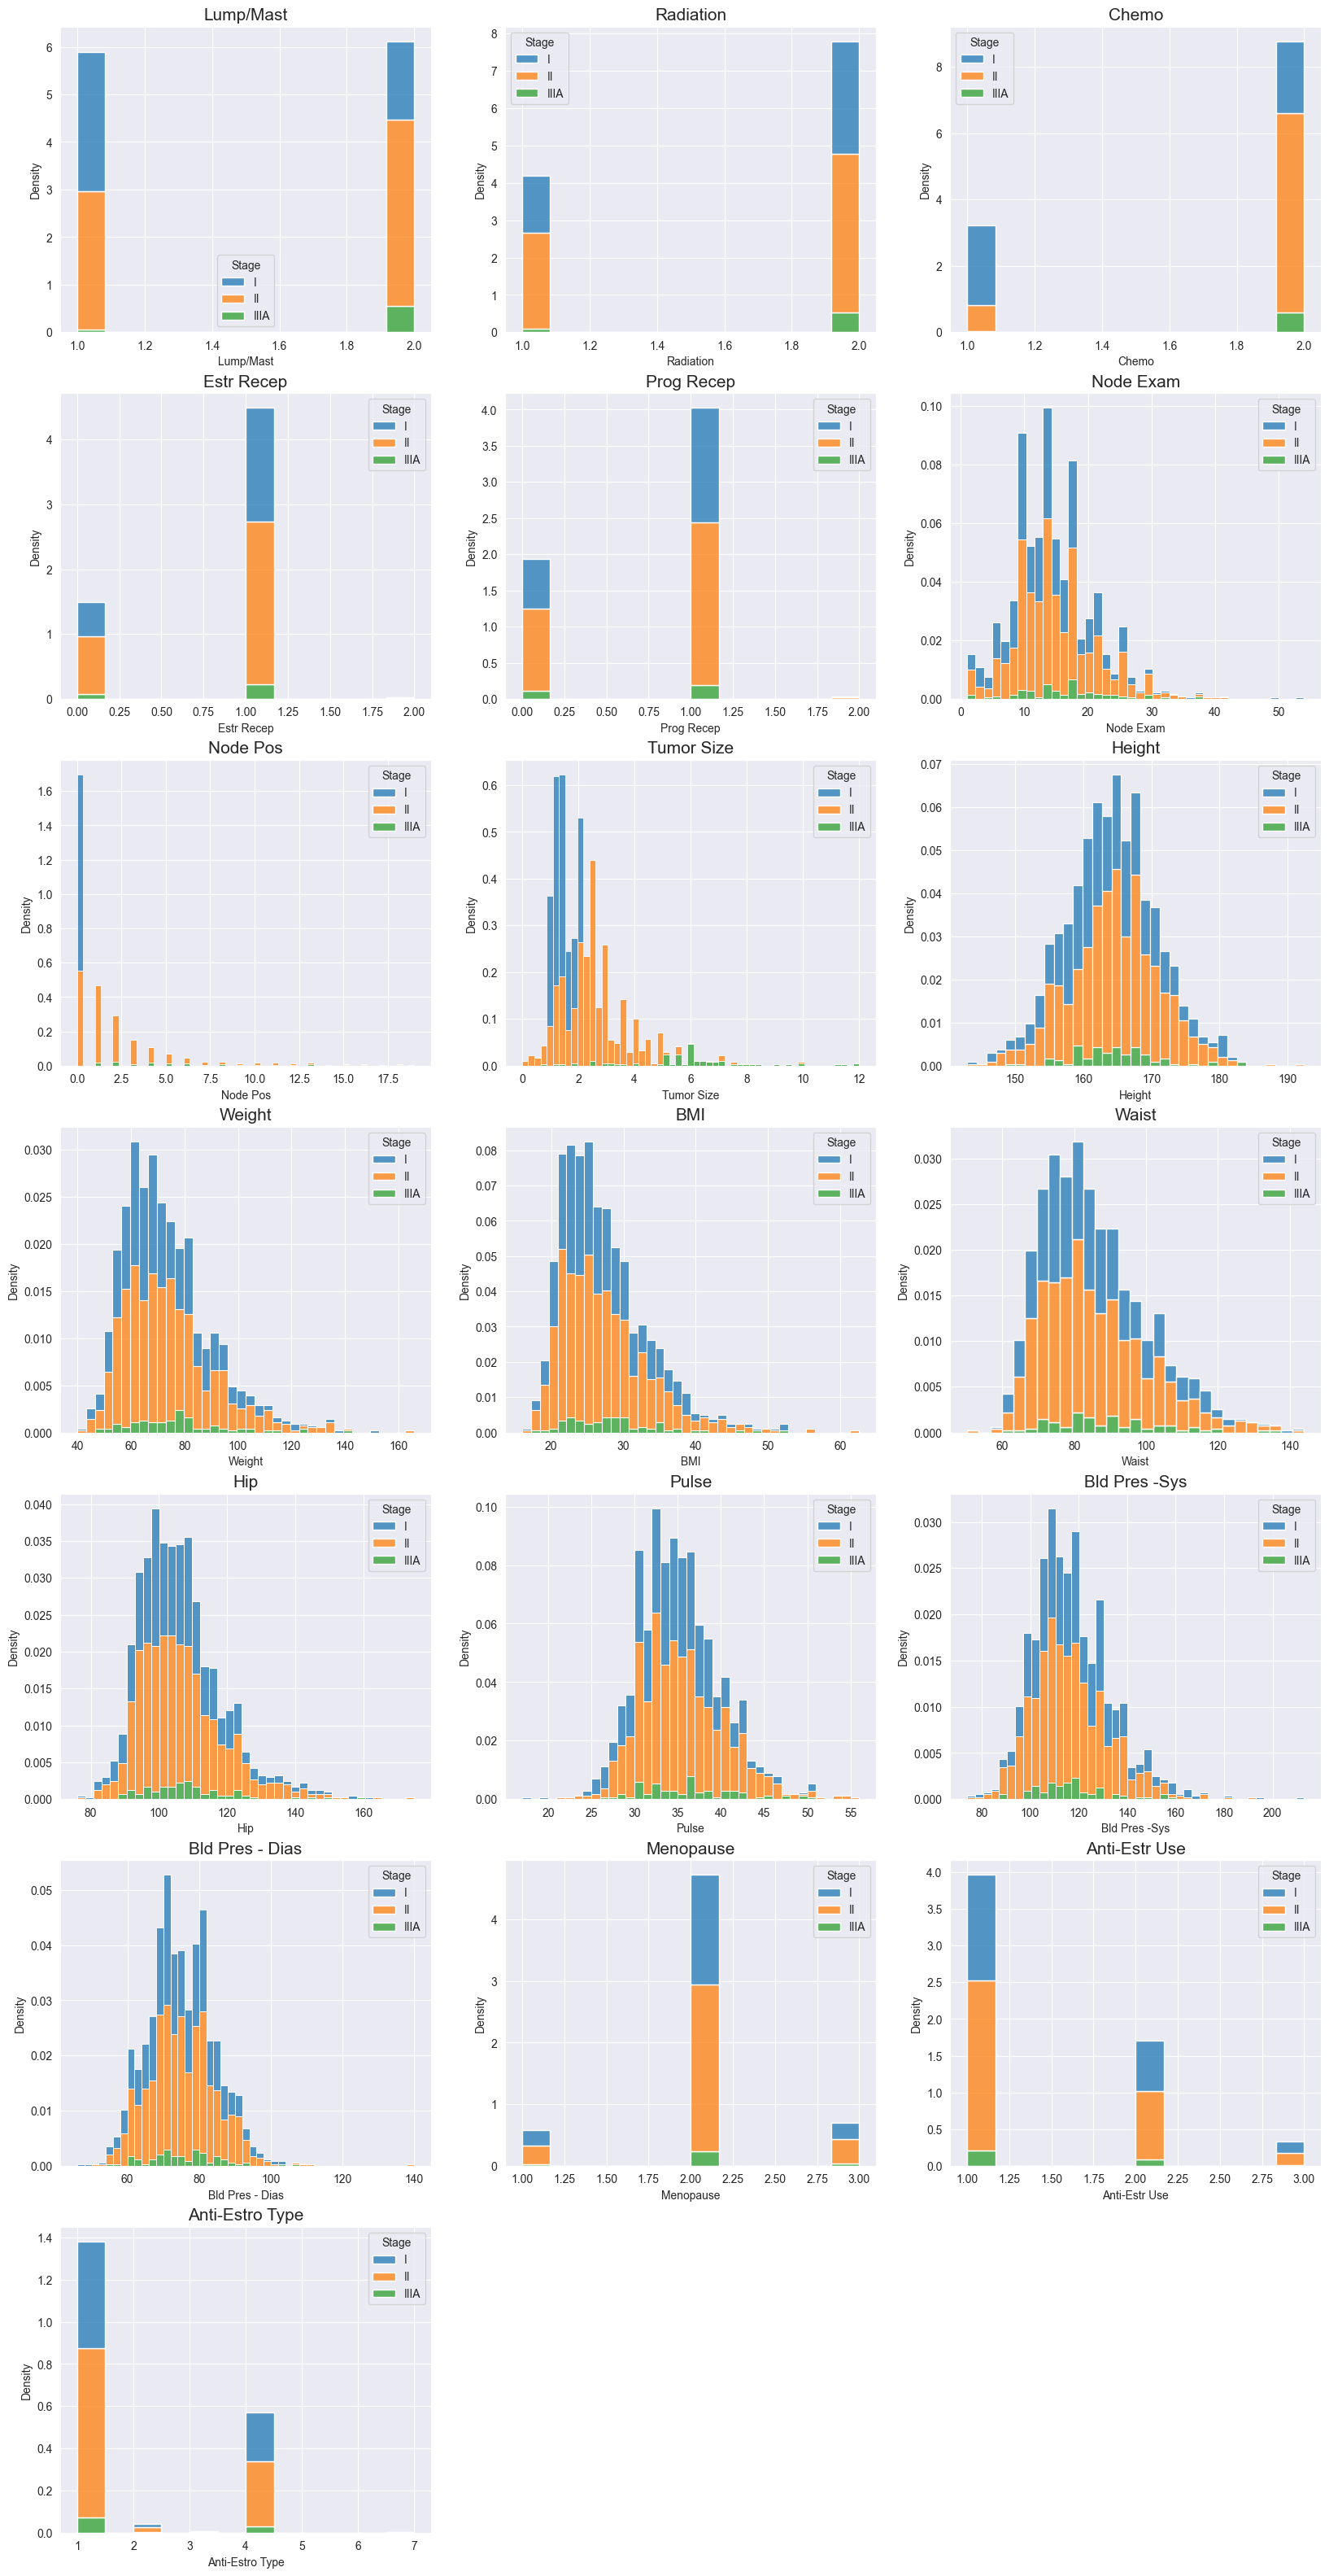

In [45]:
pos = 1
plt.figure(figsize=(20,40))
for col in b_measure_clean.columns:
    if col not in ['ID', 'Tumor Type', 'Stage']:
        plt.subplot(7,3,pos)
        plt.title(f'{col}', fontdict = {'fontsize' : 15})
        sns.histplot(data=b_measure_clean, x=col, hue='Stage', stat='density', multiple='stack')
        pos+=1

### Distribution - Tumor Type
    - Tumor type

		1 Infiltrating ductal and lobular invasive
        
		2 Lobular invasive and not ductal
        
		3 Infiltrating ductal and not lobular invasive
        
        4 No ductal or lobular carinoma; only medullary, mucoid, papillary, tubular, anaplastic, signet ring cell or no tumor found


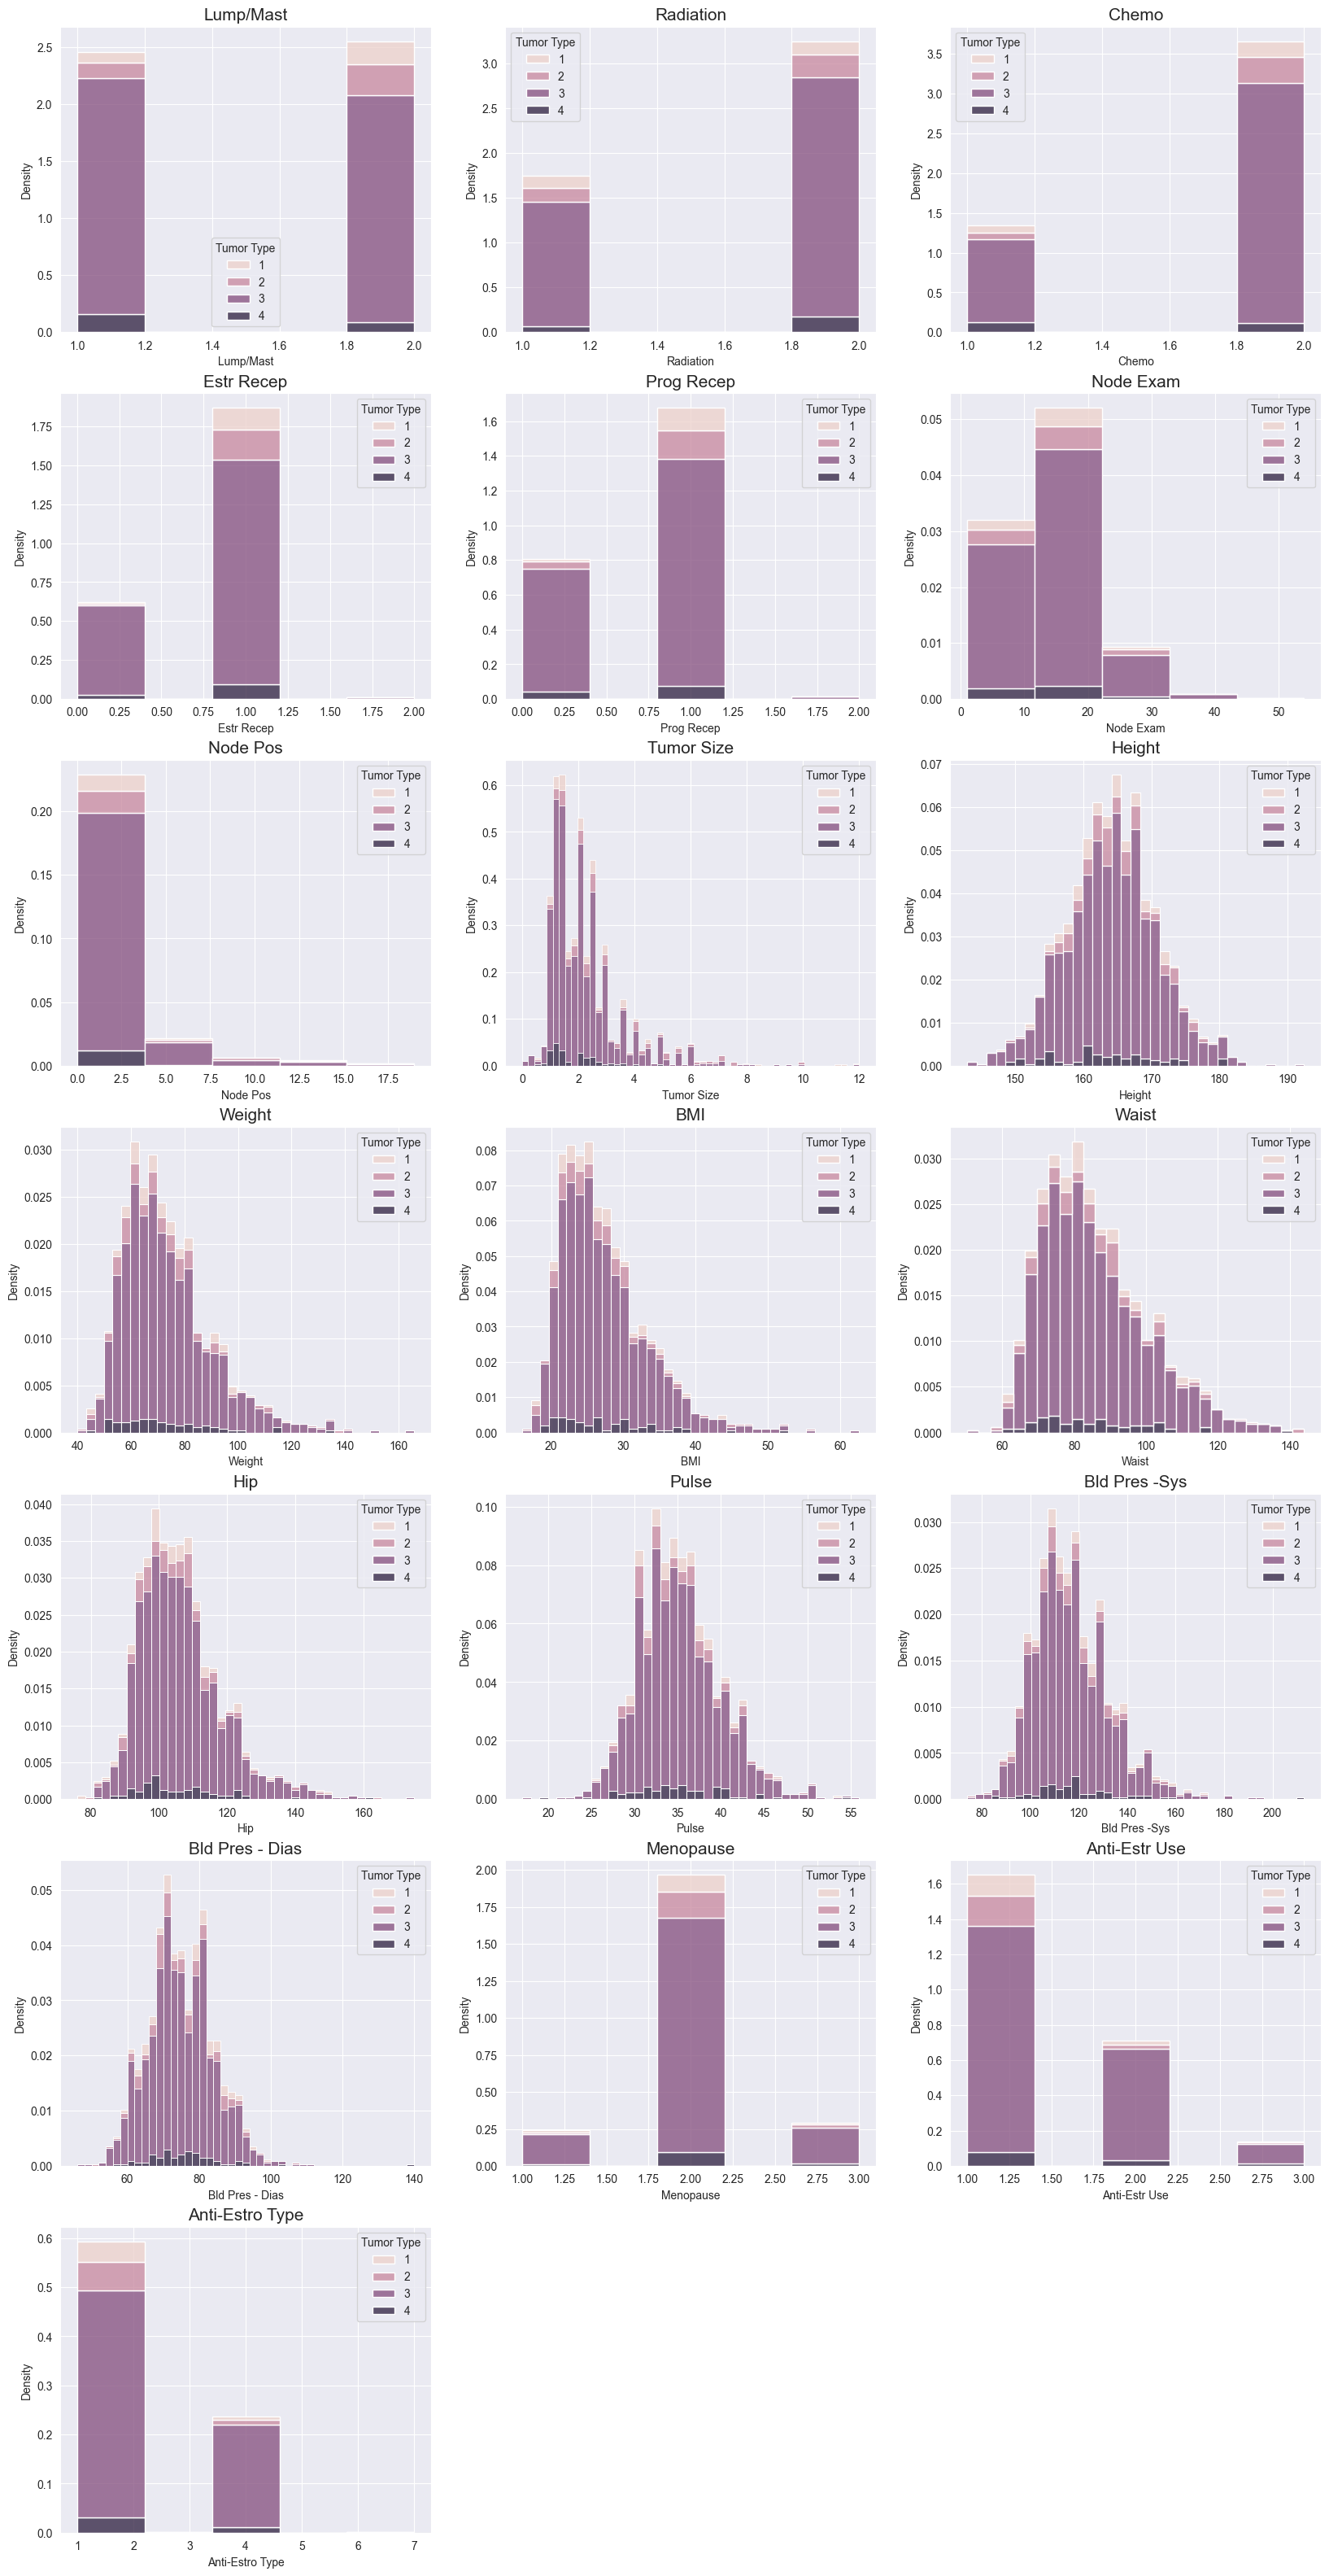

In [46]:
pos = 1
plt.figure(figsize=(20,40))
for col in b_measure_clean.columns:
    if col not in ['ID', 'Tumor Type', 'Stage']:
        if col in ['Lump/Mast', 'Radiation', 'Chemo', 'Estr Recep','Prog Recep','Node Exam', 'Node Pos','Menopause', 'Anti-Estr Use', 'Anti-Estro Type']:
            plt.subplot(7,3,pos)
            plt.title(f'{col}', fontdict = {'fontsize' : 15})
            sns.histplot(data=b_measure_clean, x=col, hue='Tumor Type', stat='density', multiple='stack', bins=5)
            pos+=1
        else:    
            plt.subplot(7,3,pos)
            plt.title(f'{col}', fontdict = {'fontsize' : 15})
            sns.histplot(data=b_measure_clean, x=col, hue='Tumor Type', stat='density', multiple='stack')
            pos+=1

# Year 1 and 4 Datasets

## Clinical Measurements 

### Cleaning and Prep

In [47]:
y1_clinical_clean = y1_clinical.dropna()
y4_clinical_clean = y4_clinical.dropna()

In [48]:
y1_clinical_clean =  y1_clinical_clean[(y1_clinical_clean.get('Pulse_30_sec') != -9)&
                                       (y1_clinical_clean.get('systolic') != -9) &
                                       (y1_clinical_clean.get('BMI') != -9) & 
                                       (y1_clinical_clean.get('diastolic') != -9)
                                      ]

y4_clinical_clean =  y4_clinical_clean[(y4_clinical_clean.get('Pulse30') != -9)&
                                       (y4_clinical_clean.get('Systolic') != -9) &
                                       (y4_clinical_clean.get('BMI') != -9) &
                                       (y4_clinical_clean.get('Diastolic') != -9)
                                      ]


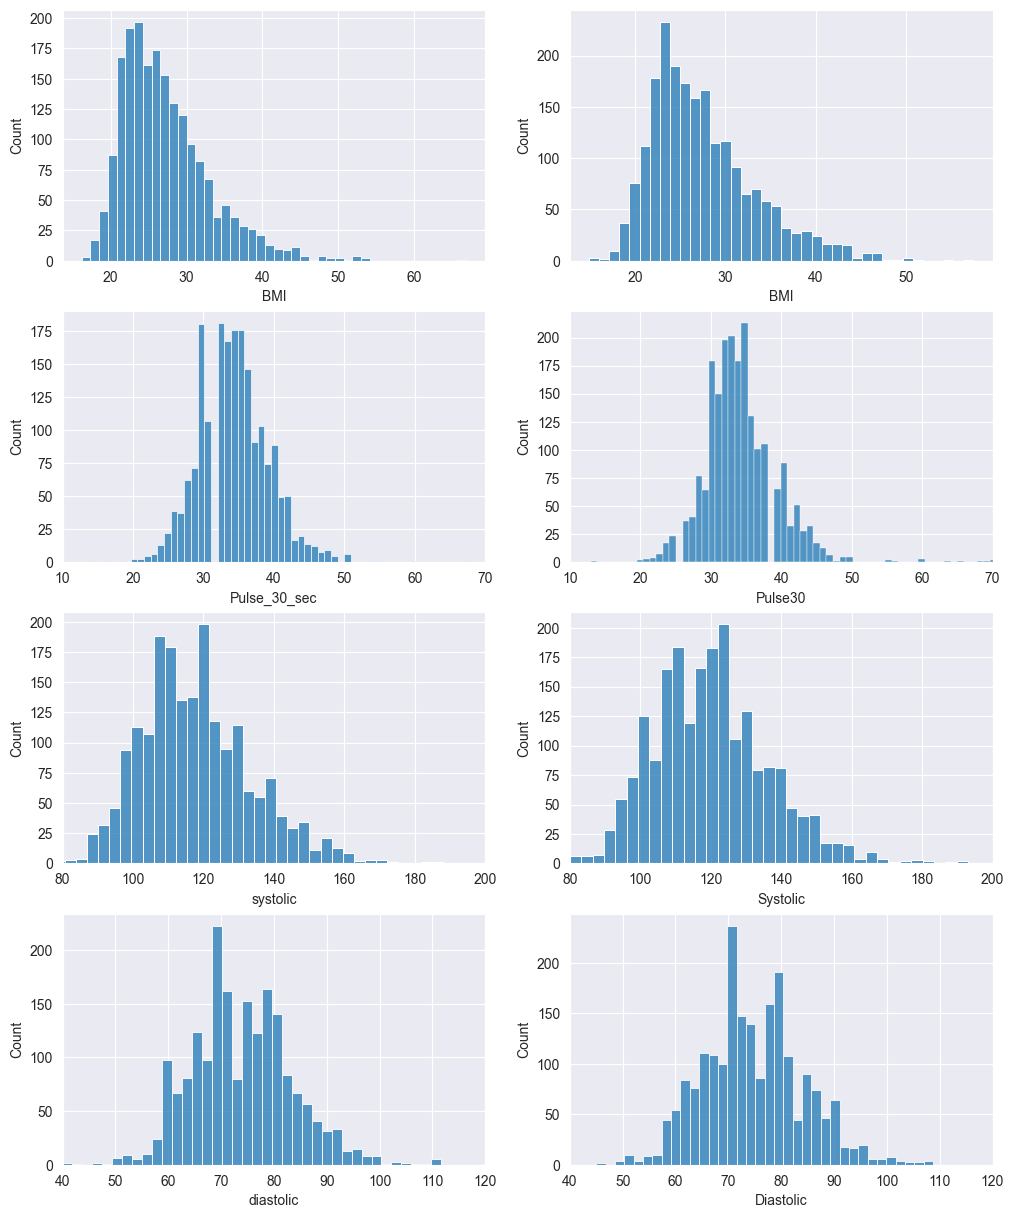

In [49]:
plt.figure(figsize=(12,15))
y4clinical_cols = ["BMI", "Pulse30", "Systolic", "Diastolic"]

plt.subplot(4,2,1)
sns.histplot(data = y1_clinical_clean, x='BMI')
# plt.title(f'Year 1 BMI')
plt.subplot(4,2,2)
sns.histplot(data = y4_clinical_clean, x='BMI')
# plt.title(f'Year 4 BMI')

plt.subplot(4,2,3)
sns.histplot(data = y1_clinical_clean, x='Pulse_30_sec')
# plt.title(f'Year 1 Pulse 30 Sec')
plt.xlim(10,70)
plt.subplot(4,2,4)
sns.histplot(data = y4_clinical_clean, x='Pulse30')
# plt.title(f'Year 4 Pulse 30 Sec')
plt.xlim(10,70)

plt.subplot(4,2,5)
sns.histplot(data = y1_clinical_clean, x='systolic')
# plt.title(f'Year 1 Systolic')
plt.xlim(80,200)
plt.subplot(4,2,6)
sns.histplot(data = y4_clinical_clean, x='Systolic')
# plt.title(f'Year 4 Systolic')
plt.xlim(80,200)

plt.subplot(4,2,7)
sns.histplot(data = y1_clinical_clean, x='diastolic')
# plt.title(f'Year 1 Systolic')
plt.xlim(40,120)

plt.subplot(4,2,8)
sns.histplot(data = y4_clinical_clean, x='Diastolic')
# plt.title(f'Year 4 Systolic')
plt.xlim(40,120)


plt.show()

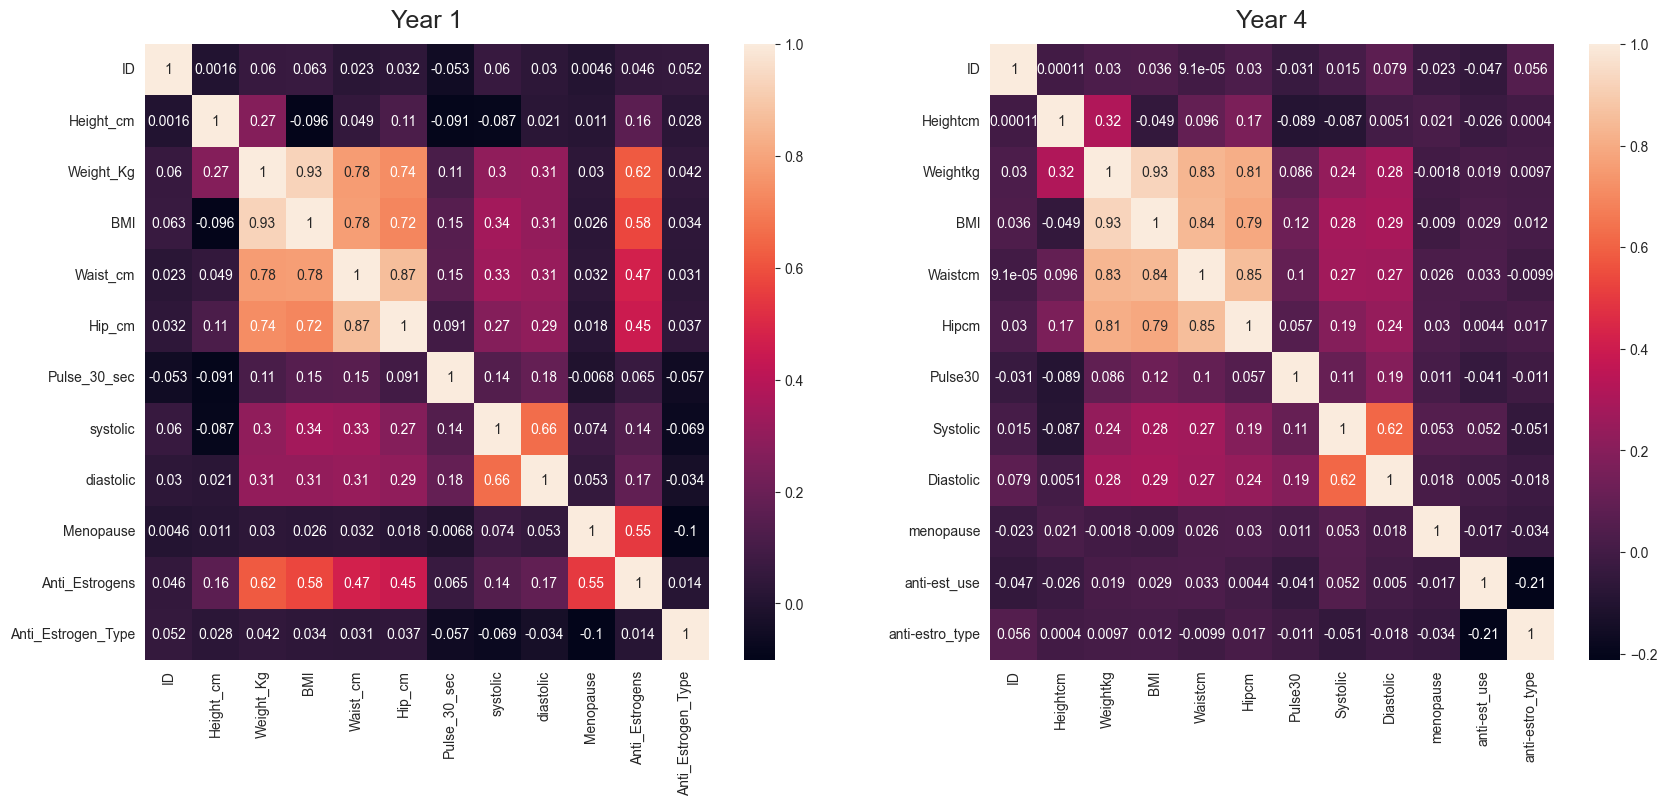

In [50]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.heatmap(y1_clinical_clean.corr(), annot = True)
plt.title('Year 1', fontdict={'fontsize':18}, pad=12)

plt.subplot(1,2,2)
sns.heatmap(y4_clinical_clean.corr(), annot = True)
plt.title('Year 4', fontdict={'fontsize':18}, pad=12)

plt.show()

### Health Status

In [51]:
y1_health_status_clean = y1_health_status[(y1_health_status.get('Exam_Freq') != 6)]
y4_health_status_clean = y4_health_status[(y4_health_status.get('Exam_Freq') != 6)]

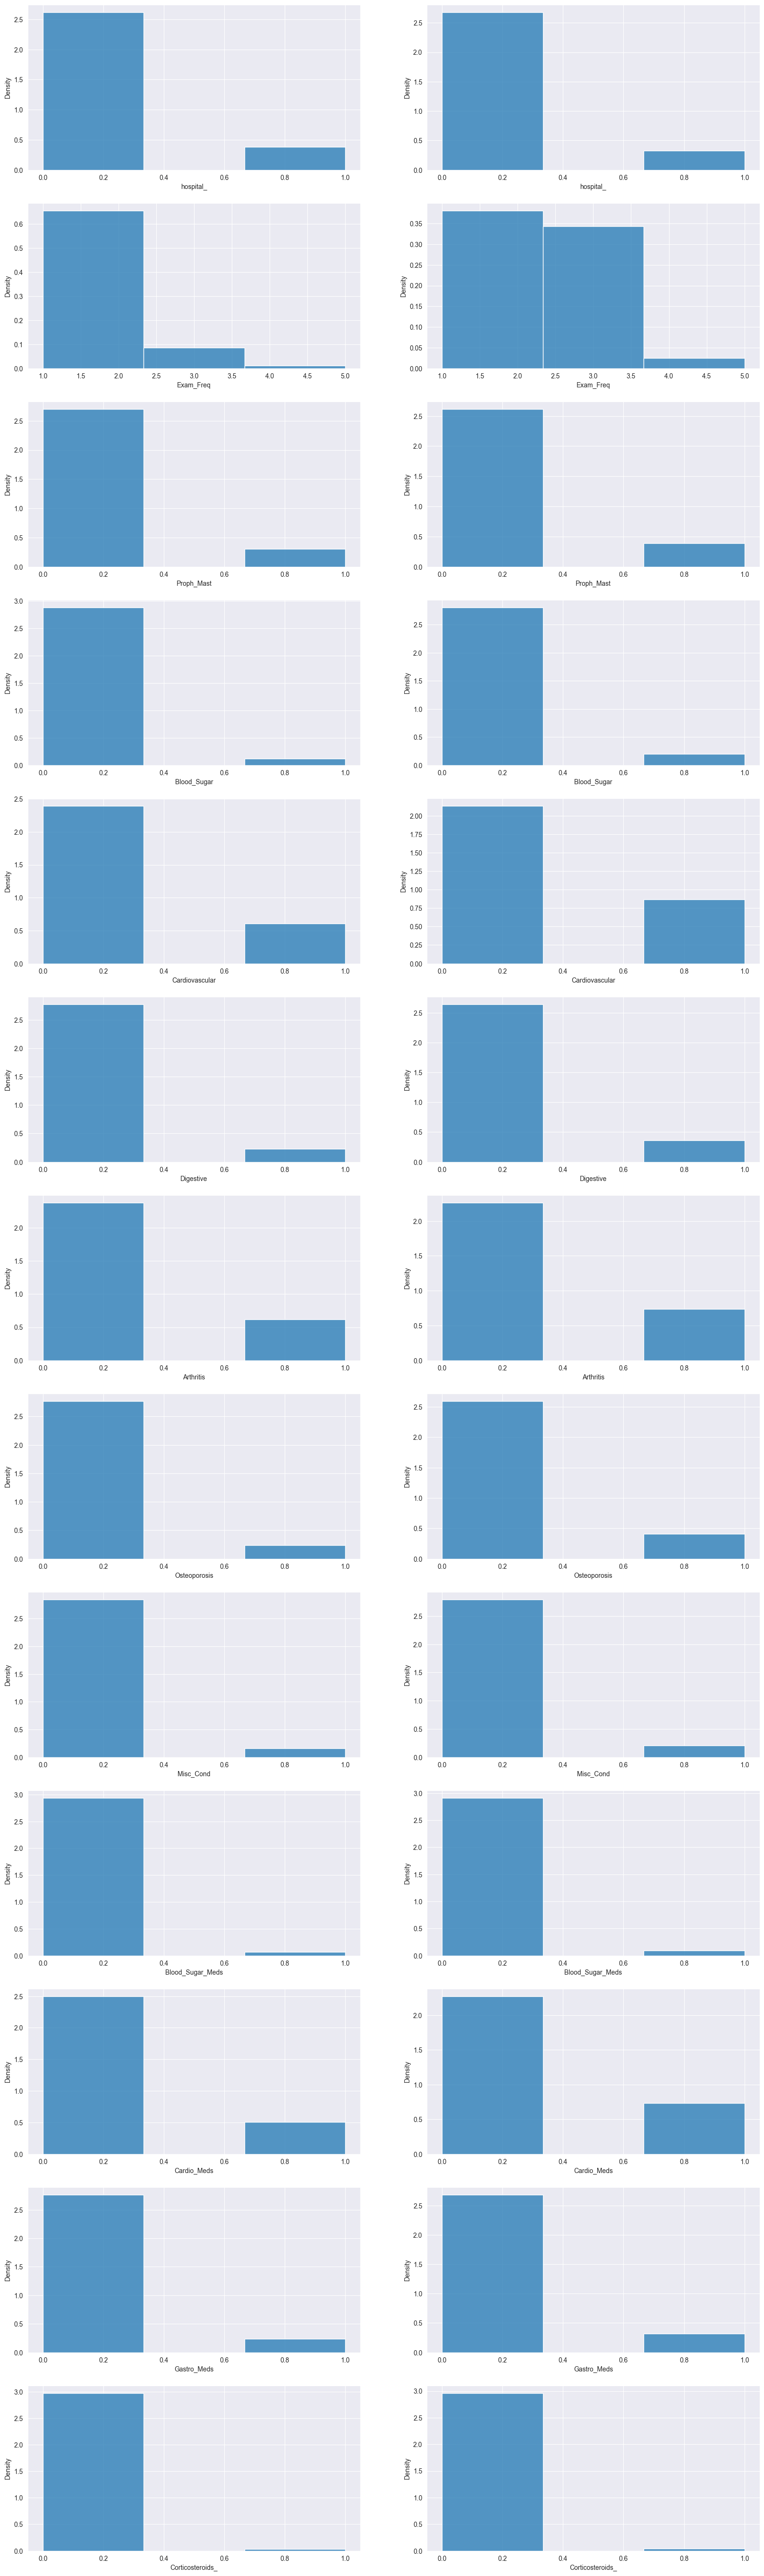

In [52]:
pos = 1 
plt.figure(figsize=(20,70))
for col in y1_health_status_clean.columns:
    if col != 'id':
        plt.subplot(13,2,pos)
        sns.histplot(data=y1_health_status_clean, x=col, stat='density', bins=3)
        pos+=1
        
        plt.subplot(13,2,pos)
        sns.histplot(data=y4_health_status_clean, x=col, stat='density', bins=3)
        pos+=1

### Blood Carotenoids

Text(0.5, 1.0, 'Year 1')

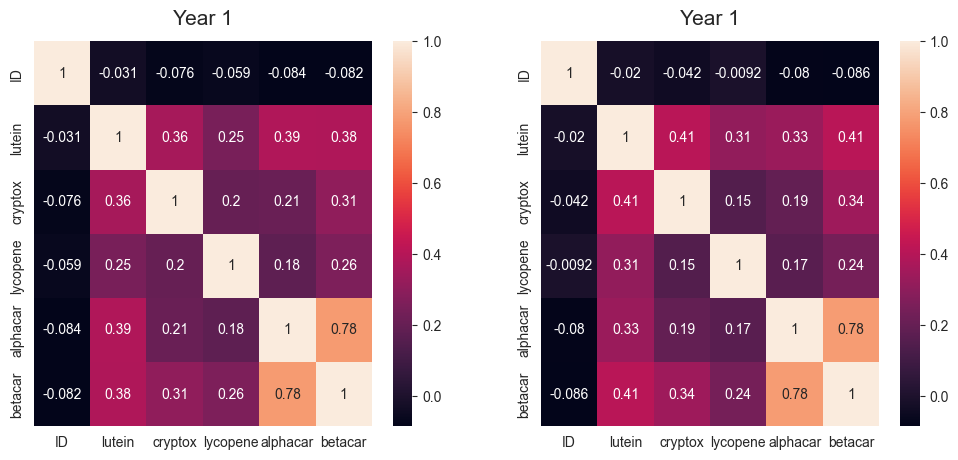

In [53]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(y1_bloodcaro.corr(), annot = True)
plt.title('Year 1', fontdict={'fontsize':15}, pad=12)

plt.subplot(1,2,2)
sns.heatmap(y4_bloodcaro.corr(), annot = True)
plt.title('Year 1', fontdict={'fontsize':15}, pad=12)

# Endpoints Datasets

In [54]:
endpoints_df.head(10)

id  intgrp  vitality  brcastatus  othcstatus  brcacontribute  Year_Dx  \
0  1002       3         1           0         0.0              -1     1994   
1  1003       3         1           0         0.0              -1     1994   
2  1005       4         1           0         0.0              -1     1991   
3  1007       3         1           0         0.0              -1     1994   
4  1008       4         1           0         0.0              -1     1994   
5  1009       4         1           3         0.0              -1     1993   
6  1010       3         0           4         0.0               1     1992   
7  1011       4         0           4         0.0               1     1994   
8  1012       4         1           0         0.0              -1     1994   
9  1015       3         0           2         0.0               1     1994   

   grade  grade2  grade3  grademiss  newstage  stage2  stage3  site0  \
0      0       0       0          1         2       1       0      1   
1      2       1       0          0         1       0       0      1   
2      0       0       0          1         2       1       0      1   
3      1       0       0          0         2       1       0      1   
4      2       1       0          0         1       0       0      1   
5      2       1       0          0         3       1       0      1   
6      2       1       0          0         4       0       1      1   
7      2       1       0          0         4       0       1      1   
8      2       1       0          0         1       0       0      1   
9      2       1       0          0         4       0       1      1   

   recur_flag  yrsdx_rand  yrsrand_endr  yrsdx_endr  yrsdx_endd  
0           0    0.761123     11.195072   11.956194   11.956194  
1           0    1.596167     10.784394   12.380561   12.380561  
2           0    4.010951     10.995209   15.006160   15.006160  
3           0    0.950034     10.995209   11.945243   11.945243  
4           0    0.446270      7.786448    8.232717    8.232717  
5           1    1.264887      4.958248    6.223135   12.459959  
6           1    2.529774      7.624914   10.154689   10.193018  
7           1    0.657084      2.121834    2.778919   10.431211  
8           0    0.317591     11.206023   11.523614   11.523614  
9           1    0.802190      0.188912    0.991102    4.960986

In [55]:
# breast cancer status 
endpoints_df['brcastatus'].value_counts()

0    2570
4     357
1      78
2      63
3      20
Name: brcastatus, dtype: int64

# Classification Model

- intend to do a binary classification:
    - **target** variable: breast cancer status (_endpoints_df['brcastatus']_) 
        - (0): No evidence of recurrence 
        - (1): Local, Regional, Distant recurrence  

## Building Dataset 
- all_merged: Baseline AND Y4 Data (**including** multiclass data)
- all_merged_stat: Y4 - Baseline (**not** including multiclass data)

### Endpoints

In [56]:
cancer_status = endpoints_df.get(['id', 'brcastatus'])
cancer_status.head()

id  brcastatus
0  1002           0
1  1003           0
2  1005           0
3  1007           0
4  1008           0

In [57]:
def to_binary(num):
    if num == 0:
        return 0 # no evidence of recurrence
    else:
        return 1 #local, regional, distant recurrence 

cancer_status = cancer_status.assign(recurrence = cancer_status.get('brcastatus').apply(to_binary))

# will merge all on all_merged
all_merged = cancer_status.get(['id', 'recurrence'])
all_merged_stat = cancer_status.get(['id', 'recurrence'])
all_merged_stat

id  recurrence
0      1002           0
1      1003           0
2      1005           0
3      1007           0
4      1008           0
...     ...         ...
3083  13241           0
3084  13242           0
3085  13243           0
3086  13244           0
3087  13245           0

[3088 rows x 2 columns]

### Merging Baseline, Y4 

- with Clinical Measurements, Food From NDS, Personal Habits, Health Status

### Merging Clinical Measurements

#### Clinical Measurements: all_merged

In [58]:
# renaming y4 and baseline columns for merge

b_measure_merge = b_measure_clean
y4_clinical_merge = y4_clinical_clean

for col in b_measure_clean.columns:
    if col != 'ID':
        b_measure_merge = b_measure_merge.rename(columns = {col:"B_"+col})
        
for col in y4_clinical_merge.columns:
    if col != "ID":
        y4_clinical_merge = y4_clinical_merge.rename(columns = {col:"y4_"+col})
        

# merging y4_clinical_merge with all_merged
all_merged = all_merged.merge(y4_clinical_merge, left_on = 'id', right_on = 'ID').drop(columns=['ID'])

# merging baseline 
all_merged = all_merged.merge(b_measure_merge, left_on = 'id', right_on='ID')

#### Clinical Measurements: all_merged_stat

In [59]:
# dropping multi/binary data
b_measure_merge_stat = b_measure_merge.drop(columns=['B_Lump/Mast', 'B_Radiation', 'B_Chemo', 'B_Tumor Type',
                                                     'B_Estr Recep', 'B_Prog Recep', 'B_Node Exam', 'B_Node Pos', 'B_Stage',
                                                     'B_Tumor Size','B_Menopause'])
b_measure_merge_stat.columns

Index(['ID', 'B_Height', 'B_Weight', 'B_BMI', 'B_Waist', 'B_Hip', 'B_Pulse',
       'B_Bld Pres -Sys', 'B_Bld Pres - Dias', 'B_Anti-Estr Use',
       'B_Anti-Estro Type'],
      dtype='object')

In [60]:
y4_clinical_merge = y4_clinical_merge.drop(columns=['y4_menopause'])
y4_clinical_merge.columns

Index(['ID', 'y4_Heightcm', 'y4_Weightkg', 'y4_BMI', 'y4_Waistcm', 'y4_Hipcm',
       'y4_Pulse30', 'y4_Systolic', 'y4_Diastolic', 'y4_anti-est_use',
       'y4_anti-estro_type'],
      dtype='object')

In [61]:
clinical_stat = pd.DataFrame()
clinical_stat['ID'] = all_merged['id']
for i in np.arange(len(y4_clinical_merge.columns)):
    if y4_clinical_merge.columns[i] != 'ID':
        clinical_stat[y4_clinical_merge.columns[i]] = all_merged[y4_clinical_merge.columns[i]] - all_merged[b_measure_merge_stat.columns[i]]

clinical_stat.head()

ID  y4_Heightcm  y4_Weightkg    y4_BMI  y4_Waistcm  y4_Hipcm  y4_Pulse30  \
0  1245     -1.10001     2.800002  1.463734    6.299998      0.00           3   
1  1249     -0.30000     7.600000  3.011001   16.400002      6.70           0   
2  1250     -1.90000    -1.399998 -0.138344   -1.000000     -2.25           0   
3  1253     -0.20000     1.900000  0.808199   -4.000000      0.00          -2   
4  1254      0.39999    -3.000002 -1.144480   -2.000000     -4.35           0   

   y4_Systolic  y4_Diastolic  y4_anti-est_use  y4_anti-estro_type  
0           -5           7.0                0                   0  
1           -1           7.0                2                   0  
2           12           6.0                2                   0  
3           -3          -2.0                0                   0  
4          -18           0.0                2                   0

In [62]:
# FINAL MERGED: 
all_merged_stat = all_merged_stat.merge(clinical_stat, left_on='id', right_on='ID')
print(all_merged_stat.shape)
all_merged_stat.head()

(1168, 13)


id  recurrence    ID  y4_Heightcm  y4_Weightkg    y4_BMI  y4_Waistcm  \
0  1245           0  1245     -1.10001     2.800002  1.463734    6.299998   
1  1249           0  1249     -0.30000     7.600000  3.011001   16.400002   
2  1250           0  1250     -1.90000    -1.399998 -0.138344   -1.000000   
3  1253           0  1253     -0.20000     1.900000  0.808199   -4.000000   
4  1254           0  1254      0.39999    -3.000002 -1.144480   -2.000000   

   y4_Hipcm  y4_Pulse30  y4_Systolic  y4_Diastolic  y4_anti-est_use  \
0      0.00           3           -5           7.0                0   
1      6.70           0           -1           7.0                2   
2     -2.25           0           12           6.0                2   
3      0.00          -2           -3          -2.0                0   
4     -4.35           0          -18           0.0                2   

   y4_anti-estro_type  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [63]:
print(all_merged.shape)
all_merged.head()

(1168, 35)


id  recurrence  y4_Heightcm  y4_Weightkg     y4_BMI  y4_Waistcm  \
0  1245           0    157.89999    64.400002  25.829834   80.599998   
1  1249           0    161.20000    68.000000  26.168501   87.900002   
2  1250           0    166.50000    43.900002  15.835656   60.000000   
3  1253           0    161.00000    80.500000  31.055899   86.500000   
4  1254           0    170.39999    65.599998  22.592520   72.500000   

   y4_Hipcm  y4_Pulse30  y4_Systolic  y4_Diastolic  ...  B_Weight    B_BMI  \
0     99.50          35          130          73.0  ...      61.6  24.3661   
1    101.80          33          111          70.0  ...      60.4  23.1575   
2     84.25          30          122          52.0  ...      45.3  15.9740   
3    109.00          30          122          78.0  ...      78.6  30.2477   
4     99.50          30           98          60.0  ...      68.6  23.7370   

   B_Waist   B_Hip  B_Pulse  B_Bld Pres -Sys  B_Bld Pres - Dias  B_Menopause  \
0     74.3   99.50       32              135                 66            2   
1     71.5   95.10       33              112                 63            2   
2     61.0   86.50       30              110                 46            2   
3     90.5  109.00       32              125                 80            2   
4     74.5  103.85       30              116                 60            3   

   B_Anti-Estr Use  B_Anti-Estro Type  
0                1                  1  
1                1                  1  
2                1                  1  
3                1                  1  
4                1                  1  

[5 rows x 35 columns]

### Merging Food From NDS

In [64]:
y4_foodnds_clean = y4_foodnds.dropna()

b_foodnds_merge = b_foodnds_clean
y4_foodnds_merge = y4_foodnds_clean

In [65]:
# checking how many rows there will be if merged 
b_foodnds_ids = np.array(b_foodnds_clean['ID'])
y4_foodnds_ids = np.array(y4_foodnds_clean['ID'])
all_merged_ids = np.array(all_merged['id'])

count = 0
for id in b_foodnds_ids:
    if (id in y4_foodnds_ids) & (id in all_merged_ids):
        count += 1
count

756

In [66]:
# dropping dependent columns

columns = ['ID','% Protein', '% Fat', '% Carb', '% Alcohol',
       'Caffeine', 'Calcium', 'Iron', 'Magnesium', 'Phosphorus', 'Potassium',
       'Sodium', 'Zinc', 'Copper', 'Selenium','alpha-Toc', 'Gamma-Toc', 'Vit D', 'Vitamin C',
       'Thiamin', 'Riboflavin', 'Niacin', 'Folacin', 'Panto. Acid', 'Vit B6',
       'Vit B12', 'Cholesterol', 'Diet Fiber', 'Soluble Fiber', 'Insol. Fiber', 'Starch',
       'Sucrose', 'Galactose', 'Fructose', 'Lactose', 'Maltose', 'Water',
       'Anim. Protein', 'Veg Prot', 'Vit K', 'Trans Fat Acids', 'Beta-Carot',
       'Alpha-Carot', 'Beta-Cryptox', 'Lut + Zeax', 'Lycopene']

b_foodnds_merge = b_foodnds_merge.get(columns)
y4_foodnds_merge = y4_foodnds_merge.get(columns)

In [67]:
# changing all datatypes as floats 
for col in b_foodnds_merge.columns:
    if col != 'ID':
        b_foodnds_merge = b_foodnds_merge.astype({col:'float'})

for col in y4_foodnds_merge.columns:
    if col != 'ID':
        y4_foodnds_merge = y4_foodnds_merge.astype({col:'float'})

In [68]:
# renaming columns 
for col in b_foodnds_merge.columns:
    if col != 'ID':
        b_foodnds_merge = b_foodnds_merge.rename(columns = {col:"B_"+col})
        
for col in y4_foodnds_merge.columns:
    if col != 'ID':
        y4_foodnds_merge = y4_foodnds_merge.rename(columns = {col:"y4_"+col})

In [69]:
# merging baseline and y4 
b_y4_foodnds = b_foodnds_merge.merge(y4_foodnds_merge, left_on='ID', right_on='ID')
b_y4_foodnds.head()

ID  B_% Protein    B_% Fat   B_% Carb  B_% Alcohol  B_Caffeine  \
0  1002    15.598059  22.828404  64.130549     0.000000       176.2   
1  1005    14.655364  29.549443  58.368737     0.011217         2.9   
2  1007    21.624958  26.037579  51.565225     1.657673       190.0   
3  1010    20.109690  24.776498  59.051741     0.001833       227.7   
4  1018    11.712579  31.147154  59.796276     0.059655        29.0   

   B_Calcium  B_Iron  B_Magnesium  B_Phosphorus  ...     y4_Water  \
0      524.0    11.9        262.0         878.0  ...  2089.209920   
1      558.0     9.9        228.0         832.0  ...  2736.944946   
2      494.0    13.7        203.0         786.0  ...  2676.532471   
3      521.0    12.5        283.0         852.0  ...  3186.373901   
4      515.0    12.5        181.0         709.0  ...  1931.117523   

   y4_Anim. Protein  y4_Veg Prot    y4_Vit K  y4_Trans Fat Acids  \
0         12.446667    28.920001   56.193333              1.3000   
1         50.410001    22.877500   86.969998              1.1275   
2         44.214999    24.367500   92.965000              3.8725   
3         30.285000    41.246485  216.025139              2.2550   
4         33.630000    23.735000   63.487500              1.7725   

   y4_Beta-Carot  y4_Alpha-Carot  y4_Beta-Cryptox  y4_Lut + Zeax   y4_Lycopene  
0   19617.276815     9841.263463       146.469995    2331.226644   1398.219971  
1    3643.492584       88.684998       285.937500    3274.600006   5686.362549  
2    7885.784912     2863.297504       190.645005    3275.244995  13269.735352  
3   78114.552734    34412.853027      1354.934021    9787.930420   3157.974976  
4    5004.782654     1847.172529       560.447516    1717.964996   5096.010162  

[5 rows x 91 columns]

In [70]:
# MERGING WITH ALL_MERGE
all_merged = all_merged.merge(b_y4_foodnds, left_on='id', right_on='ID')
print('ALL_MERGED SO FAR:')
all_merged.head()

ALL_MERGED SO FAR:


id  recurrence  y4_Heightcm  y4_Weightkg     y4_BMI  y4_Waistcm  \
0  1245           0    157.89999    64.400002  25.829834   80.599998   
1  1253           0    161.00000    80.500000  31.055899   86.500000   
2  1256           0    165.20000    75.699997  27.738043   96.300003   
3  1265           0    169.70000    73.500000  25.522524   85.699997   
4  1266           0    173.60001    71.000000  23.559111   74.500000   

   y4_Hipcm  y4_Pulse30  y4_Systolic  y4_Diastolic  ...     y4_Water  \
0      99.5          35          130          73.0  ...  2596.992493   
1     109.0          30          122          78.0  ...  3010.009460   
2     100.0          40          116          79.0  ...  2820.049988   
3     106.0          28          152          79.0  ...  3253.857483   
4     102.5          30          109          65.0  ...  3617.345032   

   y4_Anim. Protein  y4_Veg Prot    y4_Vit K  y4_Trans Fat Acids  \
0         29.995000    33.497500  171.042500              1.7175   
1         37.807500    25.688094  228.664524              1.8175   
2         37.510000    15.167500   97.039999              2.2150   
3         35.142500    32.915000  135.534999              2.6350   
4         63.695001    21.012500  134.030002              5.4000   

   y4_Beta-Carot  y4_Alpha-Carot  y4_Beta-Cryptox  y4_Lut + Zeax   y4_Lycopene  
0    4690.397461      438.067507       334.257500    3295.035065   2857.457520  
1   20367.972900     9955.656815       117.322501    5224.394165  33727.265015  
2    2785.172546      927.492479        60.557500    2154.352478    372.250004  
3   20906.732422     8687.742706        99.370000    4030.082550  29500.000000  
4    5431.022552     1299.607533       312.769993    5655.134918   6103.824951  

[5 rows x 126 columns]

In [71]:
# MERGING FOR ALL_MERGE_STAT

b_y4_foodnds_stat = pd.DataFrame()
b_y4_foodnds_stat = b_y4_foodnds_stat.assign(ID=b_y4_foodnds.get('ID'))

for col in columns: 
    if col != 'ID':
        b_y4_foodnds_stat[col] = b_y4_foodnds['y4_'+col] - b_y4_foodnds['B_'+col]
    
print('ALL_MERGED_STAT SO FAR:')
all_merged_stat = all_merged_stat.merge(b_y4_foodnds_stat, left_on='ID', right_on='ID')
all_merged_stat.head()

ALL_MERGED_STAT SO FAR:


id  recurrence    ID  y4_Heightcm  y4_Weightkg    y4_BMI  y4_Waistcm  \
0  1245           0  1245     -1.10001     2.800002  1.463734    6.299998   
1  1253           0  1253     -0.20000     1.900000  0.808199   -4.000000   
2  1256           0  1256     -2.00000    -4.800003 -1.057357   -2.999997   
3  1265           0  1265     -1.50000     2.500000  1.298224    8.699997   
4  1266           0  1266     -0.39999     2.800000  1.033011    2.900000   

   y4_Hipcm  y4_Pulse30  y4_Systolic  ...       Water  Anim. Protein  \
0       0.0           3           -5  ...  193.992493      -1.905000   
1       0.0          -2           -3  ...  130.009460      -2.392500   
2      -7.5           2           17  ...  722.049988      -5.290000   
3       1.2           1          -20  ...  499.857483     -38.457500   
4       3.0           4          -14  ...  299.345032      35.095001   

   Veg Prot      Vit K  Trans Fat Acids    Beta-Carot  Alpha-Carot  \
0  8.297500  91.972500          -0.3525   1399.397461    24.567507   
1 -1.211906 -35.345476          -0.0725  12658.972900  8501.656815   
2 -6.132500   7.219999          -0.4350   -311.827454   248.392479   
3  1.315000  34.244999          -1.4150  18381.732422  8353.942706   
4 -5.087500  26.660002           1.3200  -5628.977448 -1542.992467   

   Beta-Cryptox   Lut + Zeax      Lycopene  
0     54.597500  1790.035065    250.457520  
1     68.522501   973.394165  33727.265015  
2     15.737500  -347.647522  -1278.749996  
3     61.490000  2007.082550  26804.000000  
4    312.769993  2945.134918   4928.824951  

[5 rows x 58 columns]

### Merging Health Status 
(note: all columns are multiclass, so only added for all_merged

In [72]:
b_status_clean.head()

ID  hospital_  Exam_Freq  Proph_Mast  Blood_Sugar  Cardiovascular  \
0  13245        0.0        1.0         0.0          0.0             0.0   
1  13244        1.0        1.0         0.0          0.0             0.0   
2  13243        0.0        1.0         0.0          0.0             0.0   
3  13242        0.0        1.0         0.0          0.0             0.0   
4  13241        0.0        3.0         0.0          0.0             0.0   

   Digestive  Arthritis  Osteoporosis  Misc_Cond  Blood_Sugar_Meds  \
0        0.0        0.0           0.0        0.0               0.0   
1        0.0        0.0           0.0        0.0               0.0   
2        0.0        0.0           0.0        0.0               0.0   
3        0.0        0.0           0.0        0.0               0.0   
4        0.0        0.0           0.0        1.0               0.0   

   Cardio_Meds  Gastro_Meds  Corticosteroids_  
0          0.0          0.0               0.0  
1          0.0          0.0               0.0  
2          0.0          0.0               0.0  
3          0.0          0.0               0.0  
4          1.0          1.0               0.0

In [73]:
y4_status_clean = y4_health_status.dropna()
y4_status_clean.head()

id  hospital_  Exam_Freq  Proph_Mast  Blood_Sugar  Cardiovascular  \
0  1002        0.0          2         0.0            0               0   
1  1005        0.0          3         0.0            0               0   
2  1007        0.0          2         0.0            0               0   
3  1010        1.0          3         0.0            0               0   
4  1012        0.0          3         0.0            0               0   

   Digestive  Arthritis  Osteoporosis  Misc_Cond  Blood_Sugar_Meds  \
0          0          0             0          0                 0   
1          0          0             0          0                 0   
2          0          0             0          0                 0   
3          0          1             0          0                 0   
4          0          1             0          0                 0   

   Cardio_Meds  Gastro_Meds  Corticosteroids_  
0            0            0                 0  
1            0            0                 0  
2            1            0                 0  
3            0            0                 0  
4            0            0                 0

In [74]:
# checking how many ids left 
b_status_ids = np.array(b_status_clean.get('ID'))
y4_status_clean_ids = np.array(y4_status_clean.get('id'))
all_merged_ids = np.array(all_merged.get('id'))

count = 0
for col in b_status_ids:
    if (col in y4_status_clean_ids) & (col in all_merged_ids):
        count += 1
count

702

In [75]:
# prepping to merge 
b_status_merge = b_status_clean 
y4_status_merge = y4_status_clean

# renaming columns
for col in b_status_merge.columns:
    if col != 'ID':
        b_status_merge = b_status_merge.rename(columns = {col:"B_"+col})
        
for col in y4_status_merge.columns:
    if col != 'id':
        y4_status_merge = y4_status_merge.rename(columns = {col:"y4_"+col})

In [76]:
# merging baseline and y4 
b_y4_status = b_status_merge.merge(y4_status_merge, left_on='ID', right_on='id')

# merging to all_merged
all_merged = all_merged.merge(b_y4_status, left_on='id', right_on='ID')

print('ALL MERGED SO FAR:')
all_merged

ALL MERGED SO FAR:


id_x  recurrence  y4_Heightcm  y4_Weightkg     y4_BMI  y4_Waistcm  \
0     1245           0    157.89999    64.400002  25.829834   80.599998   
1     1253           0    161.00000    80.500000  31.055899   86.500000   
2     1256           0    165.20000    75.699997  27.738043   96.300003   
3     1265           0    169.70000    73.500000  25.522524   85.699997   
4     1266           0    173.60001    71.000000  23.559111   74.500000   
..     ...         ...          ...          ...        ...         ...   
698  13237           0    147.20000    52.799999  24.367910   74.000000   
699  13241           0    149.10001    74.000000  33.287136  101.500000   
700  13242           0    163.70000    65.000000  24.255823   79.000000   
701  13243           0    161.80000    94.199997  35.982704  114.000000   
702  13245           0    165.50000    73.000000  26.651821   83.000000   

       y4_Hipcm  y4_Pulse30  y4_Systolic  y4_Diastolic  ...  y4_Blood_Sugar  \
0     99.500000          35          130          73.0  ...               0   
1    109.000000          30          122          78.0  ...               0   
2    100.000000          40          116          79.0  ...               0   
3    106.000000          28          152          79.0  ...               0   
4    102.500000          30          109          65.0  ...               0   
..          ...         ...          ...           ...  ...             ...   
698   95.199997          41          130          78.0  ...               0   
699  113.000000          39          132          69.5  ...               0   
700  100.000000          31          120          72.0  ...               0   
701  112.500000          42          122          83.0  ...               0   
702  106.500000          34          116          90.0  ...               0   

     y4_Cardiovascular  y4_Digestive  y4_Arthritis  y4_Osteoporosis  \
0                    1             1             1                0   
1                    0             0             0                0   
2                    0             0             1                1   
3                    1             0             1                0   
4                    0             0             0                0   
..                 ...           ...           ...              ...   
698                  0             0             1                0   
699                  0             0             1                1   
700                  1             0             0                0   
701                  1             0             0                0   
702                  0             0             0                0   

     y4_Misc_Cond  y4_Blood_Sugar_Meds  y4_Cardio_Meds  y4_Gastro_Meds  \
0               0                    0               1               0   
1               0                    0               0               0   
2               1                    0               0               0   
3               0                    0               1               0   
4               0                    0               0               1   
..            ...                  ...             ...             ...   
698             0                    0               0               0   
699             0                    0               1               1   
700             0                    0               1               0   
701             0                    0               0               0   
702             0                    0               0               0   

     y4_Corticosteroids_  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
..                   ...  
698                    0  
699                    0  
700                    0  
701                    0  
702                    0  

[703 rows x 154 columns]

In [77]:
print(all_merged_stat.shape)
all_merged_stat.head()

(756, 58)


id  recurrence    ID  y4_Heightcm  y4_Weightkg    y4_BMI  y4_Waistcm  \
0  1245           0  1245     -1.10001     2.800002  1.463734    6.299998   
1  1253           0  1253     -0.20000     1.900000  0.808199   -4.000000   
2  1256           0  1256     -2.00000    -4.800003 -1.057357   -2.999997   
3  1265           0  1265     -1.50000     2.500000  1.298224    8.699997   
4  1266           0  1266     -0.39999     2.800000  1.033011    2.900000   

   y4_Hipcm  y4_Pulse30  y4_Systolic  ...       Water  Anim. Protein  \
0       0.0           3           -5  ...  193.992493      -1.905000   
1       0.0          -2           -3  ...  130.009460      -2.392500   
2      -7.5           2           17  ...  722.049988      -5.290000   
3       1.2           1          -20  ...  499.857483     -38.457500   
4       3.0           4          -14  ...  299.345032      35.095001   

   Veg Prot      Vit K  Trans Fat Acids    Beta-Carot  Alpha-Carot  \
0  8.297500  91.972500          -0.3525   1399.397461    24.567507   
1 -1.211906 -35.345476          -0.0725  12658.972900  8501.656815   
2 -6.132500   7.219999          -0.4350   -311.827454   248.392479   
3  1.315000  34.244999          -1.4150  18381.732422  8353.942706   
4 -5.087500  26.660002           1.3200  -5628.977448 -1542.992467   

   Beta-Cryptox   Lut + Zeax      Lycopene  
0     54.597500  1790.035065    250.457520  
1     68.522501   973.394165  33727.265015  
2     15.737500  -347.647522  -1278.749996  
3     61.490000  2007.082550  26804.000000  
4    312.769993  2945.134918   4928.824951  

[5 rows x 58 columns]

### Cleaning all_merged and all_merged_stat

### all_merged

In [78]:
# dropping duplicated 'ID' columns
all_merged_col = np.array(all_merged.columns)
duplicates = []

for col in all_merged_col: 
    if ('id' in col) | ('ID' in col):
        duplicates.append(col)

all_merged = all_merged.drop(columns=['ID_x','ID_y','ID', 'id_y'])
all_merged = all_merged.rename(columns={'id_x':'id'})

print(all_merged.shape)
all_merged.head()

(703, 150)


id  recurrence  y4_Heightcm  y4_Weightkg     y4_BMI  y4_Waistcm  \
0  1245           0    157.89999    64.400002  25.829834   80.599998   
1  1253           0    161.00000    80.500000  31.055899   86.500000   
2  1256           0    165.20000    75.699997  27.738043   96.300003   
3  1265           0    169.70000    73.500000  25.522524   85.699997   
4  1266           0    173.60001    71.000000  23.559111   74.500000   

   y4_Hipcm  y4_Pulse30  y4_Systolic  y4_Diastolic  ...  y4_Blood_Sugar  \
0      99.5          35          130          73.0  ...               0   
1     109.0          30          122          78.0  ...               0   
2     100.0          40          116          79.0  ...               0   
3     106.0          28          152          79.0  ...               0   
4     102.5          30          109          65.0  ...               0   

   y4_Cardiovascular  y4_Digestive  y4_Arthritis  y4_Osteoporosis  \
0                  1             1             1                0   
1                  0             0             0                0   
2                  0             0             1                1   
3                  1             0             1                0   
4                  0             0             0                0   

   y4_Misc_Cond  y4_Blood_Sugar_Meds  y4_Cardio_Meds  y4_Gastro_Meds  \
0             0                    0               1               0   
1             0                    0               0               0   
2             1                    0               0               0   
3             0                    0               1               0   
4             0                    0               0               1   

   y4_Corticosteroids_  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 150 columns]

In [79]:
# lowercase all columns
for col in all_merged.columns:
    all_merged = all_merged.rename(columns={col:col.lower()})
all_merged.head()

id  recurrence  y4_heightcm  y4_weightkg     y4_bmi  y4_waistcm  \
0  1245           0    157.89999    64.400002  25.829834   80.599998   
1  1253           0    161.00000    80.500000  31.055899   86.500000   
2  1256           0    165.20000    75.699997  27.738043   96.300003   
3  1265           0    169.70000    73.500000  25.522524   85.699997   
4  1266           0    173.60001    71.000000  23.559111   74.500000   

   y4_hipcm  y4_pulse30  y4_systolic  y4_diastolic  ...  y4_blood_sugar  \
0      99.5          35          130          73.0  ...               0   
1     109.0          30          122          78.0  ...               0   
2     100.0          40          116          79.0  ...               0   
3     106.0          28          152          79.0  ...               0   
4     102.5          30          109          65.0  ...               0   

   y4_cardiovascular  y4_digestive  y4_arthritis  y4_osteoporosis  \
0                  1             1             1                0   
1                  0             0             0                0   
2                  0             0             1                1   
3                  1             0             1                0   
4                  0             0             0                0   

   y4_misc_cond  y4_blood_sugar_meds  y4_cardio_meds  y4_gastro_meds  \
0             0                    0               1               0   
1             0                    0               0               0   
2             1                    0               0               0   
3             0                    0               1               0   
4             0                    0               0               1   

   y4_corticosteroids_  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 150 columns]

### all_merged_stat

In [80]:
# dropping duplicate 'ID' columns
all_merged_stat_col = np.array(all_merged_stat.columns)
duplicates = []

for col in all_merged_stat_col: 
    if ('id' in col) | ('ID' in col):
        duplicates.append(col)

all_merged_stat = all_merged_stat.drop(columns=['ID'])
all_merged_stat.head()

id  recurrence  y4_Heightcm  y4_Weightkg    y4_BMI  y4_Waistcm  y4_Hipcm  \
0  1245           0     -1.10001     2.800002  1.463734    6.299998       0.0   
1  1253           0     -0.20000     1.900000  0.808199   -4.000000       0.0   
2  1256           0     -2.00000    -4.800003 -1.057357   -2.999997      -7.5   
3  1265           0     -1.50000     2.500000  1.298224    8.699997       1.2   
4  1266           0     -0.39999     2.800000  1.033011    2.900000       3.0   

   y4_Pulse30  y4_Systolic  y4_Diastolic  ...       Water  Anim. Protein  \
0           3           -5           7.0  ...  193.992493      -1.905000   
1          -2           -3          -2.0  ...  130.009460      -2.392500   
2           2           17          19.0  ...  722.049988      -5.290000   
3           1          -20         -12.0  ...  499.857483     -38.457500   
4           4          -14         -13.0  ...  299.345032      35.095001   

   Veg Prot      Vit K  Trans Fat Acids    Beta-Carot  Alpha-Carot  \
0  8.297500  91.972500          -0.3525   1399.397461    24.567507   
1 -1.211906 -35.345476          -0.0725  12658.972900  8501.656815   
2 -6.132500   7.219999          -0.4350   -311.827454   248.392479   
3  1.315000  34.244999          -1.4150  18381.732422  8353.942706   
4 -5.087500  26.660002           1.3200  -5628.977448 -1542.992467   

   Beta-Cryptox   Lut + Zeax      Lycopene  
0     54.597500  1790.035065    250.457520  
1     68.522501   973.394165  33727.265015  
2     15.737500  -347.647522  -1278.749996  
3     61.490000  2007.082550  26804.000000  
4    312.769993  2945.134918   4928.824951  

[5 rows x 57 columns]

In [81]:
# changing col name 
for col in all_merged_stat.columns:
    if('y4_' in col):
        all_merged_stat = all_merged_stat.rename(columns={col:col[3:].lower() +'_ovt'})
    else:
        all_merged_stat = all_merged_stat.rename(columns={col:col.lower() +'_ovt'})

all_merged_stat = all_merged_stat.rename(columns={'id_ovt':'id', 'recurrence_ovt':'recurrence'})
all_merged_stat.head()

id  recurrence  heightcm_ovt  weightkg_ovt   bmi_ovt  waistcm_ovt  \
0  1245           0      -1.10001      2.800002  1.463734     6.299998   
1  1253           0      -0.20000      1.900000  0.808199    -4.000000   
2  1256           0      -2.00000     -4.800003 -1.057357    -2.999997   
3  1265           0      -1.50000      2.500000  1.298224     8.699997   
4  1266           0      -0.39999      2.800000  1.033011     2.900000   

   hipcm_ovt  pulse30_ovt  systolic_ovt  diastolic_ovt  ...   water_ovt  \
0        0.0            3            -5            7.0  ...  193.992493   
1        0.0           -2            -3           -2.0  ...  130.009460   
2       -7.5            2            17           19.0  ...  722.049988   
3        1.2            1           -20          -12.0  ...  499.857483   
4        3.0            4           -14          -13.0  ...  299.345032   

   anim. protein_ovt  veg prot_ovt  vit k_ovt  trans fat acids_ovt  \
0          -1.905000      8.297500  91.972500              -0.3525   
1          -2.392500     -1.211906 -35.345476              -0.0725   
2          -5.290000     -6.132500   7.219999              -0.4350   
3         -38.457500      1.315000  34.244999              -1.4150   
4          35.095001     -5.087500  26.660002               1.3200   

   beta-carot_ovt  alpha-carot_ovt  beta-cryptox_ovt  lut + zeax_ovt  \
0     1399.397461        24.567507         54.597500     1790.035065   
1    12658.972900      8501.656815         68.522501      973.394165   
2     -311.827454       248.392479         15.737500     -347.647522   
3    18381.732422      8353.942706         61.490000     2007.082550   
4    -5628.977448     -1542.992467        312.769993     2945.134918   

   lycopene_ovt  
0    250.457520  
1  33727.265015  
2  -1278.749996  
3  26804.000000  
4   4928.824951  

[5 rows x 57 columns]

### Exporting all_merged and all_merged_stat

In [82]:
all_merged_stat.to_csv('C:/Users/leena/Niema_ML/all_merged_stat.csv', index=False)

In [83]:
all_merged.to_csv('C:/Users/leena/Niema_ML/all_merged.csv', index=False)

**base_measure** (clinical measurements) 
1. `Tumor Type` (_multiclass_)
2. `Chemo` (_binary_)
3. `Bld Pres -Sys` and `Bld Pres - Dias` - blood pressure systolic and diastolic (_quantitative_)
4. `BMI` (_quantitative_)
5. `Lump/Mast` - Lumpectomy/Mastectomy (_multiclass_)

_having mastectomy would indicate that the patient would have no chance of recurrence_

**base_foodnds** (food from nds)  

6. `% Protein`(_quantitative_) 

7. `% Fat`(_quantitative_)  

8. `% Carb`(_quantitative_)

9. `% Alcohol`(_quantitative_)  


**base_habits** (personal habits) 

10. `smoking status`(_multiclass_)  

11. `pack years` (_quantitative_)  

12. `NEW METS` - exercise METS/week, refer to documentation for more info on METS (_quantitative_)  

13. `wgt history` - adult weight history (_multiclass_)   


**base_health_status** (health status)  

14. `hospital_` - hospitalized in the last 2 years (_binary_)   

15. `Blood_Sugar`- blood sugar conditions, documentation for more (_binary_)  

16. `Cardiovascular`- cardiovascular conditions, documentation for more (_binary_)  

17. `Digestive` - digestive conditions, documentation for more (_binary_)  

18. `Arthritis` (_binary_)  

19. `Osteoporosis`(_binary_)  

**endpoint** (after the study) 

20. `vitality` (_binary_)
21. `othcstatus` - other cancer status (_multiclass_)
22. `grade` - cancer grade (_multiclass_) 
23. `newstage` - cancer stage (_multiclass_) 